<u><h2 style="font-family:Calibri (Body); color:royalblue" >To predict a large number of observations, analyzing sequences of data reported by specialized harnesses or smartphones.</h2></u>.

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
  
%matplotlib inline

## Obtain the train data

In [2]:
train=pd.read_csv('train.csv')
train.shape

(7352, 563)

In [3]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [6]:
train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238


In [7]:
train[train['Activity'] == 'STANDING'].head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


<i><p style="font-size:15px;">As a result, we can see that data have taken the count of STANDING from the train data.

In [8]:
train.dtypes.tail()

angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
dtype: object

<i><p style="font-size:15px;">They have the same data types. That is, primarily floats and one object feature. Let's see what the object feature is and extract it from the rest.

## Obtain the test data

In [9]:
test=pd.read_csv('test.csv')
test.shape

(2947, 563)

In [10]:
test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [12]:
test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,2947.0,0.273996,0.060570,-0.592004,0.262075,0.277113,0.288097,0.671887
tBodyAcc-mean()-Y,2947.0,-0.017863,0.025745,-0.362884,-0.024961,-0.016967,-0.010143,0.246106
tBodyAcc-mean()-Z,2947.0,-0.108386,0.042747,-0.576184,-0.121162,-0.108458,-0.097123,0.494114
tBodyAcc-std()-X,2947.0,-0.613635,0.412597,-0.999606,-0.990914,-0.931214,-0.267395,0.465299
tBodyAcc-std()-Y,2947.0,-0.508330,0.494269,-1.000000,-0.973664,-0.790972,-0.105919,1.000000


In [13]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,2947.0,0.273996,0.060570,-0.592004,0.262075,0.277113,0.288097,0.671887
tBodyAcc-mean()-Y,2947.0,-0.017863,0.025745,-0.362884,-0.024961,-0.016967,-0.010143,0.246106
tBodyAcc-mean()-Z,2947.0,-0.108386,0.042747,-0.576184,-0.121162,-0.108458,-0.097123,0.494114
tBodyAcc-std()-X,2947.0,-0.613635,0.412597,-0.999606,-0.990914,-0.931214,-0.267395,0.465299
tBodyAcc-std()-Y,2947.0,-0.508330,0.494269,-1.000000,-0.973664,-0.790972,-0.105919,1.000000
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",2947.0,-0.017298,0.501311,-0.991096,-0.428375,-0.026726,0.394387,1.000000
"angle(X,gravityMean)",2947.0,-0.513923,0.509205,-0.984195,-0.829722,-0.729648,-0.545939,0.833180
"angle(Y,gravityMean)",2947.0,0.074886,0.324300,-0.913704,0.022140,0.181563,0.260252,1.000000
"angle(Z,gravityMean)",2947.0,-0.048720,0.241467,-0.949228,-0.098485,-0.010671,0.092373,0.973113


In [14]:
test.dtypes.tail()

angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
dtype: object

<i><p style="font-size:15px;">They have the same data types. That is, primarily floats and one object feature. Let's see what the object feature is and extract it from the rest.

<h3>Changing Feature Name</h3>

<i><p style="color:black;font-size:15px;">We can see some () 'bracket' among the feature's name. We will eliminate all specific brackets quickly. So it's easier for us to type correctly next.

In [15]:
columns = train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [16]:
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

<i><p style="color:black;font-size:15px;">We have decided which categorical variables you want to use in model

In [17]:
for col_name in train.columns:
    if train[col_name].dtypes == 'int64':
        unique_cat = len(train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'subject' has 21 unique categories


<i><p style="color:black;font-size:15px;">Although "Activity" has a lot of unique categories, most categories only have a few observations

In [18]:
train['Activity'].value_counts().sort_values(ascending=False).head()

LAYING              1407
STANDING            1374
SITTING             1286
WALKING             1226
WALKING_UPSTAIRS    1073
Name: Activity, dtype: int64

In [19]:
pd.crosstab(train.subject, train.Activity, margins = True).style.background_gradient(cmap='OrRd')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


# Exploratory data analysis

In [20]:
import seaborn as sns
from matplotlib import gridspec
import matplotlib.cm as cm

<b><p style="font-size:19px;">% of Different categories

<i><p style="color:black;font-size:15px;">There are five different activities, i.e., 'Standing,' 'Sitting,' 'Laying,' 'Walking,' 'Walking_downstairs,' 'Walking_upstairs.'

In [21]:
with sns.axes_style('whitegrid'):
    label_freq = train['Activity'].value_counts() / len(train)
    print(label_freq)

LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: Activity, dtype: float64


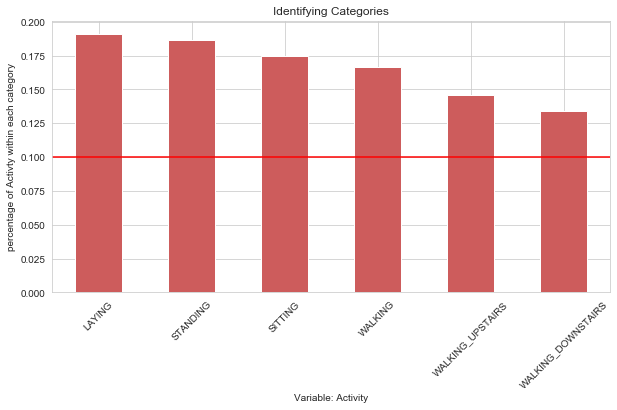

In [22]:
with sns.axes_style('whitegrid'):
    fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(10,5),
                                                           align='center',
                                                           color='indianred')
    fig.axhline(y=0.10, color='red')
    fig.set_ylabel('percentage of Activty within each category')
    fig.set_xlabel('Variable: Activity')
    fig.set_title('Identifying Categories')
    plt.xticks(rotation=45)
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>

<i><p style="color:black;font-size:15px;">As the percentage is roughly equal, consequently, we can examine it to a balanced dataset.

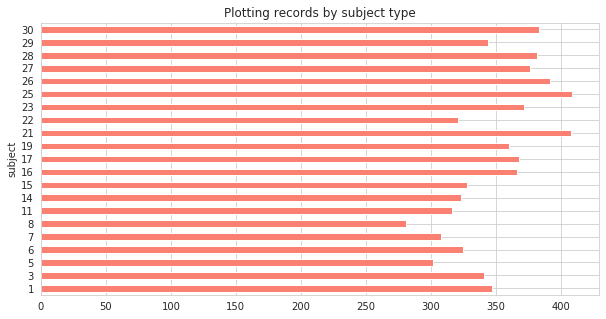

In [23]:
with sns.axes_style('whitegrid'):
    train.groupby(['subject']).subject.count().plot(kind='barh',
                                      title='Plotting records by subject type', 
                                      figsize=(10,5),color='salmon',
                                      align='center')

<b><p style="font-size:15px;"> Conclusion</b>

<i><p style="color:black;font-size:15px;">Subject ID  19 and 25 did a lot of different activities.

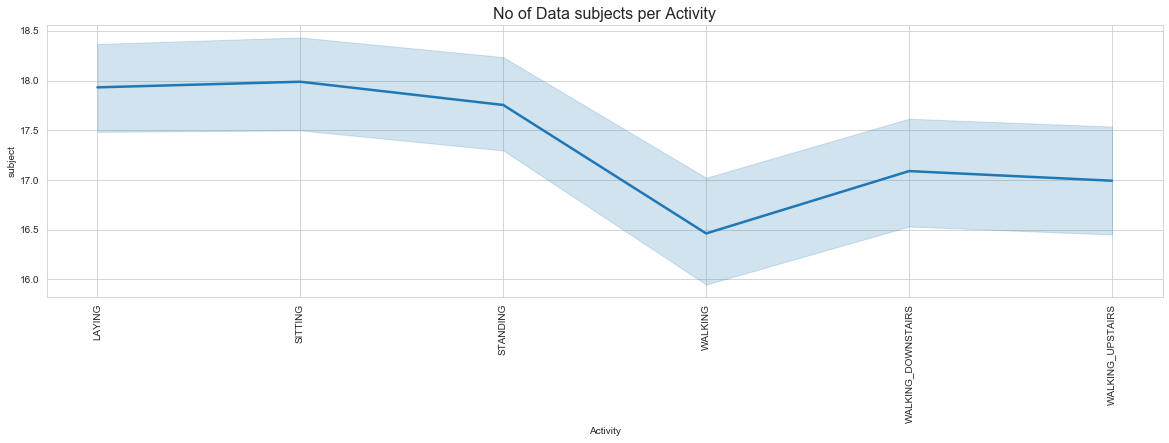

In [24]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(20,5))
    plt.title('No of Data subjects per Activity', fontsize=16)
    sns.lineplot(x="Activity", y="subject",data=train,palette="tab10", linewidth=2.5,drawstyle='default')
    plt.xticks(rotation=90)
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>

<i><p style="color:black;font-size:15px;">In data show, Individual subjects perform an activity depending on their habits. We can recognize the underlying activity as quite challenging on their determine.

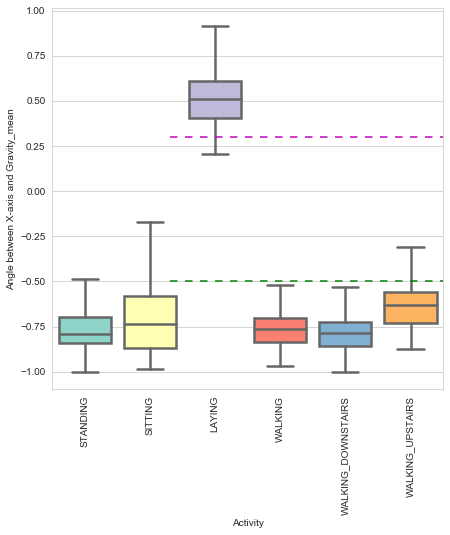

In [25]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(7,7))
    sns.boxplot(x='Activity',
            y='angleXgravityMean',
            data=train,
            palette="Set3",
            linewidth=2.5,
            dodge=False,
            showfliers=False,
            saturation=1)
    plt.axhline(y=-0.5, xmin=0.3, xmax=1,dashes=(5,5), c='g')
    plt.axhline(y=0.3, xmin=0.3, dashes=(5,5), c='m')
    plt.ylabel('Angle between X-axis and Gravity_mean')
    plt.xticks(rotation=90)
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>

<i><p style="color:black;font-size:15px;">
<li>angleXgravityMean is < 0.0 then the Activities are either Standing or Sitting orWalking or WalkingDownstairs or WalkingUpstairs.</li>
<li>angleXgravityMean is > 0.0 then the Activity is Laying .</li>
</i></p>

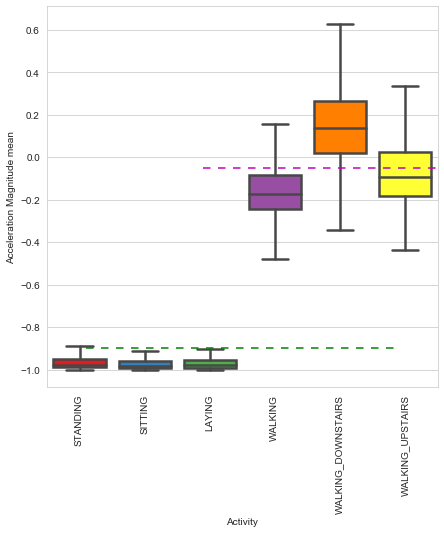

In [26]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(7,7))
    sns.boxplot(x='Activity', 
            y='tBodyAccMagmean',
            data=train, 
            palette="Set1",
            linewidth=2.5,
            dodge=False,
            showfliers=False,
            saturation=1)
    plt.ylabel('Acceleration Magnitude mean')
    plt.axhline(y=-0.9, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
    plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
    plt.xticks(rotation=90)
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>

<i><p style="color:black;font-size:15px;">
    <li>tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.</li>
    <li>tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.</li>
    <li>tAccMean is > 0.0 then the Activity is WalkingDownstairs.</li>
    <li>We can classify 75% the Acitivity labels with some errors.</li>

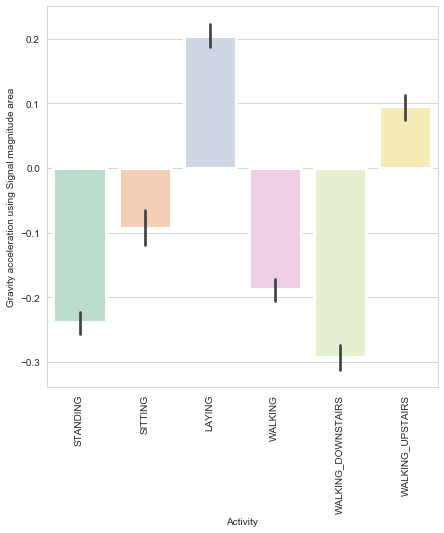

In [27]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(7,7))
    sns.barplot(x='Activity', y='tGravityAccsma',data=train,
            palette="Pastel2",
            linewidth=3)
    plt.ylabel('Gravity acceleration using Signal magnitude area')
    plt.xticks(rotation=90)
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>

<i><p style="color:black;font-size:15px;">
    <li>tGravityAccsma is < 0.0 then the Activities are either Standing or Sitting or Walking or WalkingDownstairs.</li>
    <li>tGravityAccsma is > 0.0 then the Activities are either Laying or WalkingUpstairs .</li>
    

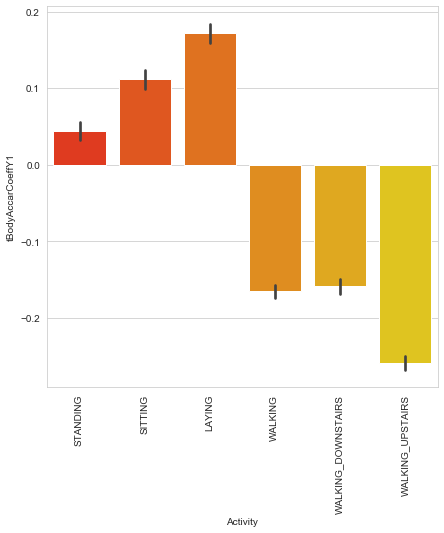

In [28]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(7,7))
    sns.barplot(x="Activity",
                y="tBodyAccarCoeffY1",
                data=train,
                palette="autumn")
    plt.xticks(rotation=90)
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>

<i><p style="color:black;font-size:15px;">
    <li>tBodyAccarCoeffY1 is > 0.0 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.</li>
    <li>tBodyAccarCoeffY1 is < 0.0 then the Activities are either Laying or Standing or Sitting  .</li>
    

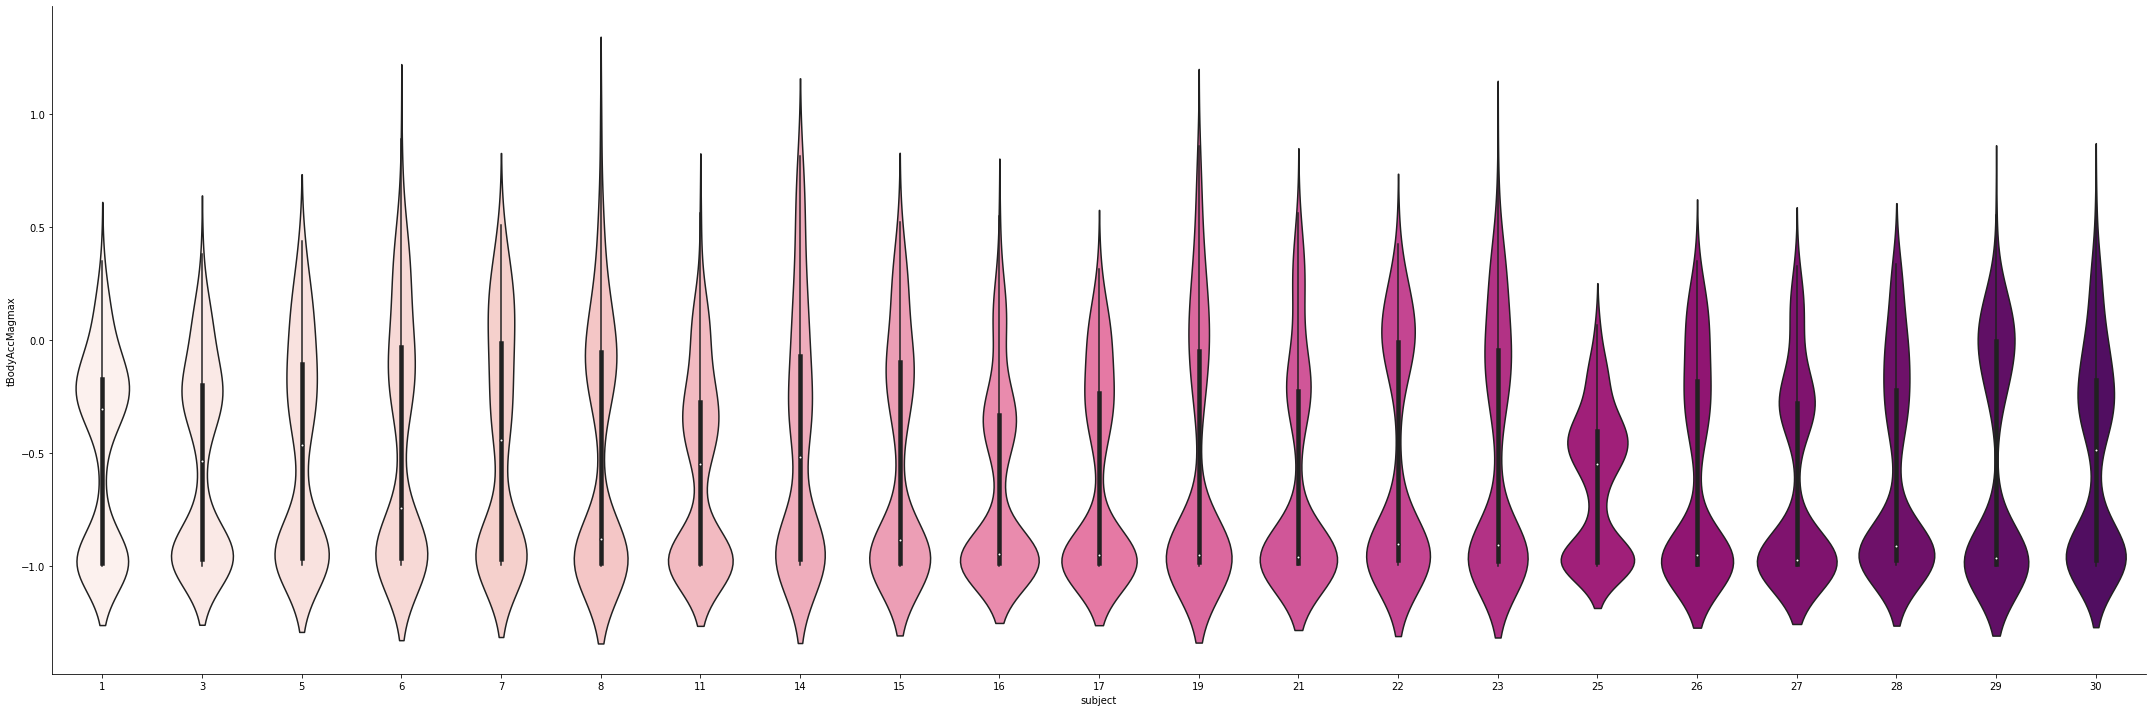

In [29]:
sns.catplot(x="subject", 
            y="tBodyAccMagmax",
            data=train, 
            kind="violin",
            height=10,
             palette="RdPu",
            aspect=3,
            hue_order= "Activity")
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>

<i><p style="color:black;font-size:15px;"> We examined the train data to check the balance between the tBodyAccMagmax observations performed by the 30 subjects.

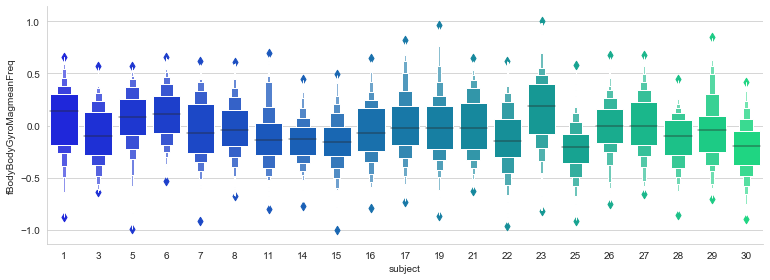

In [30]:
with sns.axes_style('whitegrid'):
    sns.catplot(x="subject", 
            y="fBodyBodyGyroMagmeanFreq",
            data=train, 
            kind="boxen",
             palette="winter",
            height=4,
            aspect=2.7,
            hue_order= "Activity")
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;"> We examined the train data to check the balance between the fBodyBodyGyroMagmeanFreq observations performed by the 30 subjects.

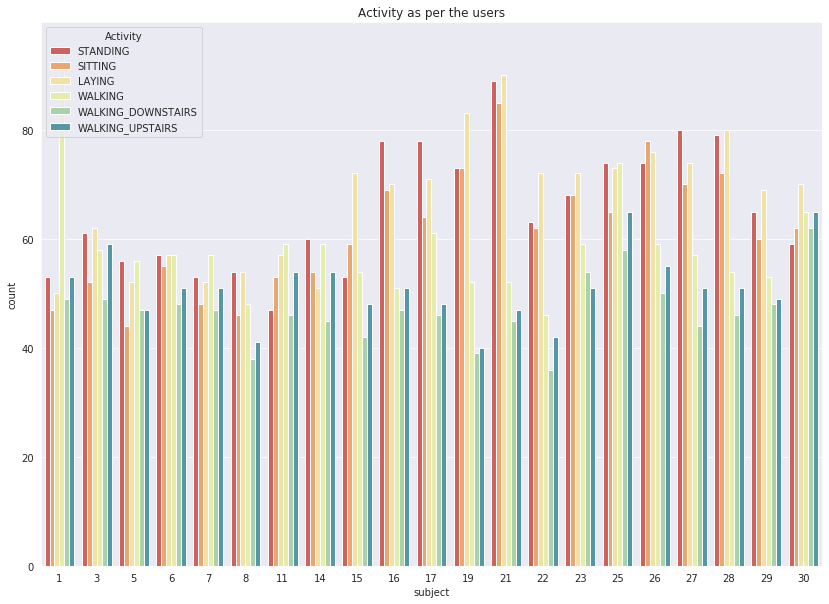

In [31]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(14,10))
    plt.title('Activity as per the users')
    g = sns.countplot(x='subject',hue='Activity', 
                      data=train, palette = 'Spectral')
    

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">As we can see, We have got the almost identical number of reading from all the subjects means there are no significant differences in reading, and then we should not worry about it. We have got almost the same number of reading from all the subjects.

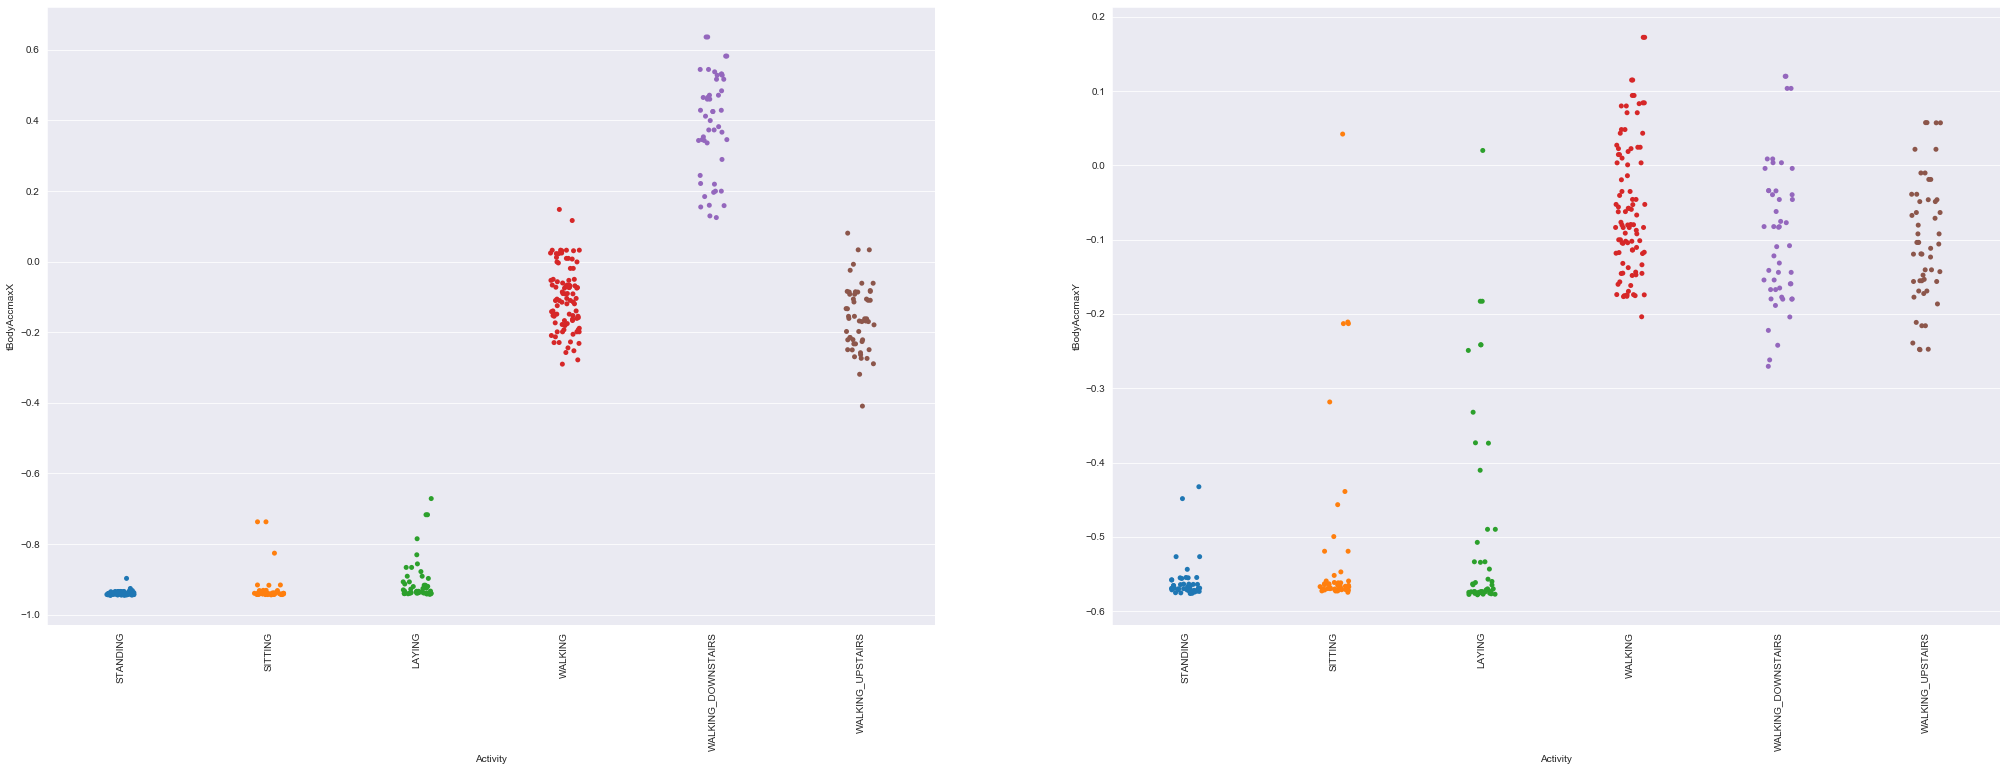

In [32]:
with sns.axes_style('darkgrid'):
    fig = plt.figure(figsize=(35,25))
    ax1 = fig.add_subplot(221)
    ax1 = sns.stripplot(x='Activity', y='tBodyAccmaxX', data=train.loc[train['subject']==1], jitter=True)
    plt.xticks(rotation=90)
    ax2 = fig.add_subplot(222)
    ax2 = sns.stripplot(x='Activity', y='tBodyAccmaxY', data=train.loc[train['subject']==1], jitter=True)
    plt.xticks(rotation=90)
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">Passive activities fall mostly below the active ones. Therefore, it makes sense that maximum acceleration is higher during the walking exercises.

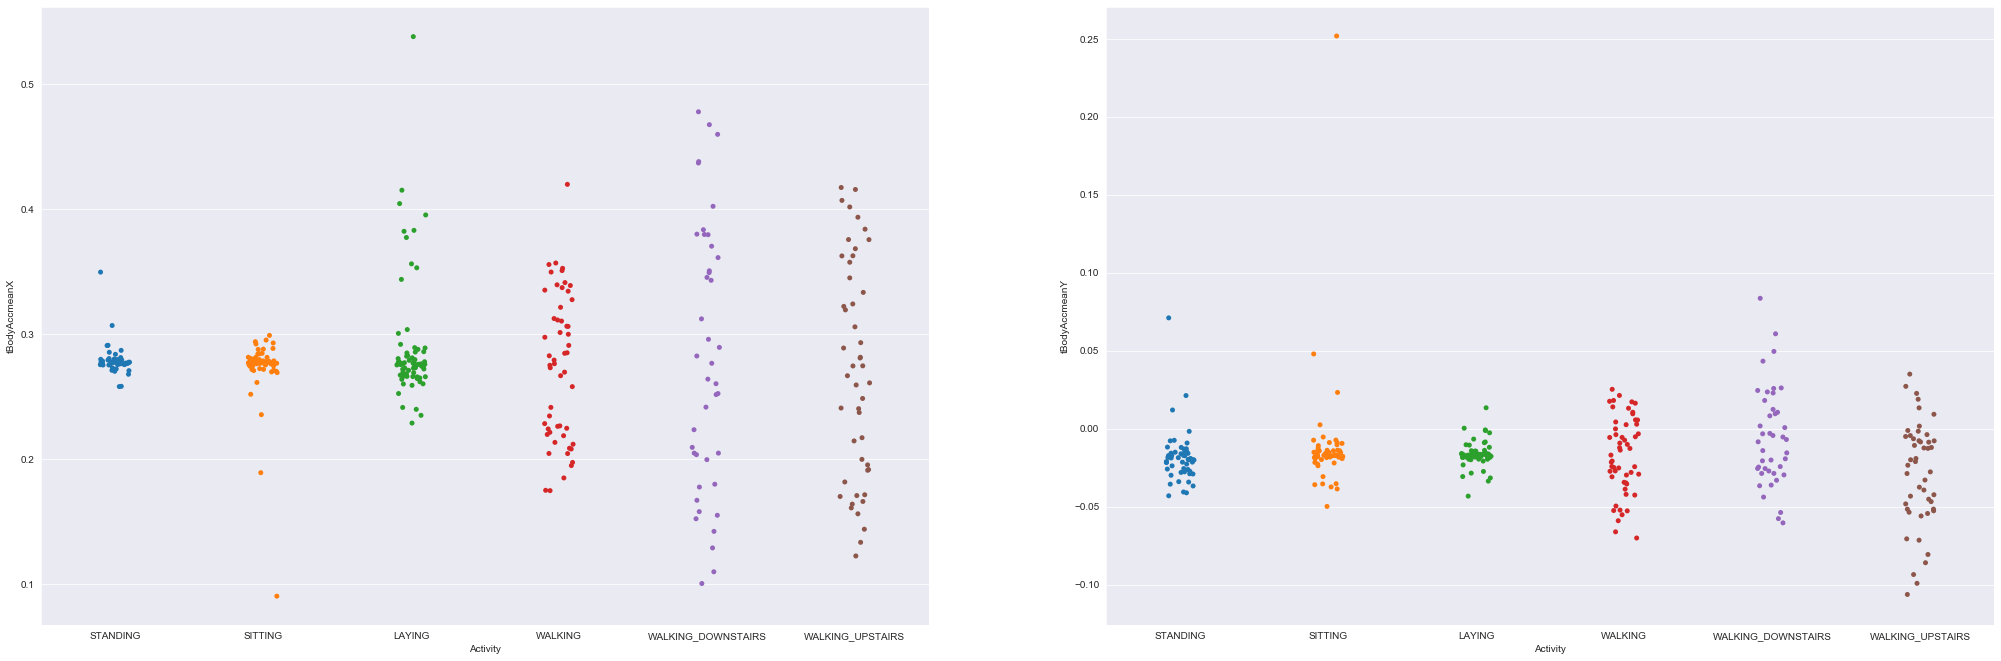

In [33]:
with sns.axes_style('darkgrid'):
    sub15 = train.loc[train['subject']==15]
    fig = plt.figure(figsize=(35,25))
    ax1 = fig.add_subplot(221)
    ax1 = sns.stripplot(x='Activity', y=sub15.iloc[:,0], data=sub15, jitter=True)
    ax2 = fig.add_subplot(222)
    ax2 = sns.stripplot(x='Activity', y=sub15.iloc[:,1], data=sub15, jitter=True)
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We can now see the difference in the distribution between the active and passive activities with the walk-down activity (i.e., values between 0.5 and 0.8) distinct from all others, especially in the X-direction. On the other hand, the passive activities are indistinguishable and present no clear pattern in any direction (X, Y, Z).

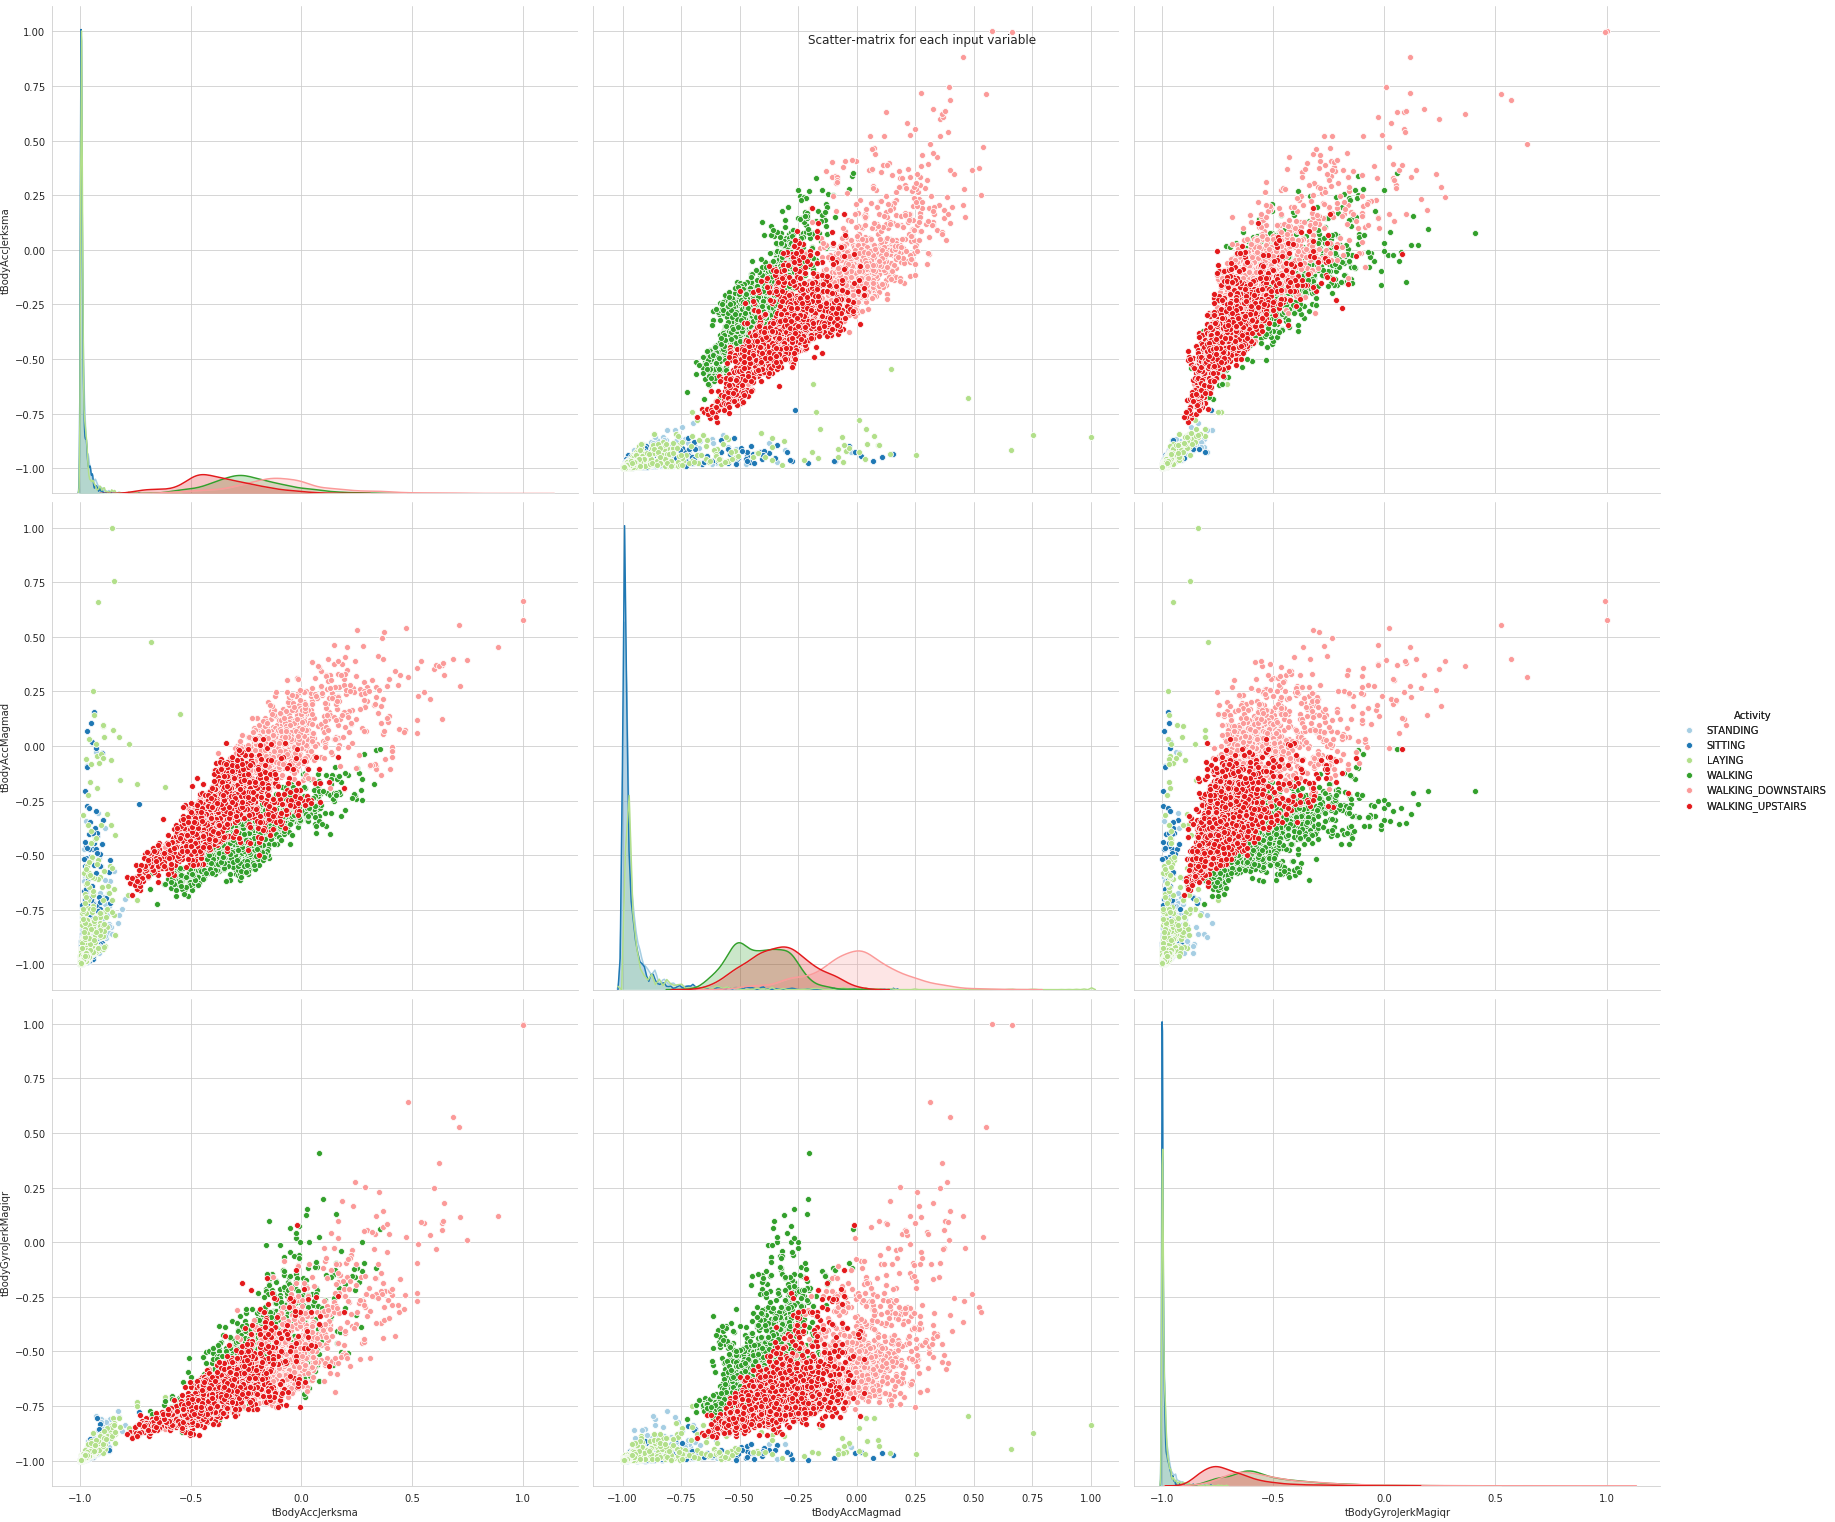

In [34]:
with sns.axes_style('whitegrid'):
    features = ['tBodyAccJerksma','tBodyAccMagmad','tBodyGyroJerkMagiqr','Activity']
    train_subset = train[features]
    g = sns.pairplot(train_subset, hue='Activity',
                 palette='Paired',height=7,
                 aspect=1)
    g.map_offdiag(sns.scatterplot)
    plt.suptitle('Scatter-matrix for each input variable')
    g.add_legend()
    plt.xticks(rotation=45)

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">Some pairs of Activities are correlated. We suggest a high correlation and a predictable relationship.

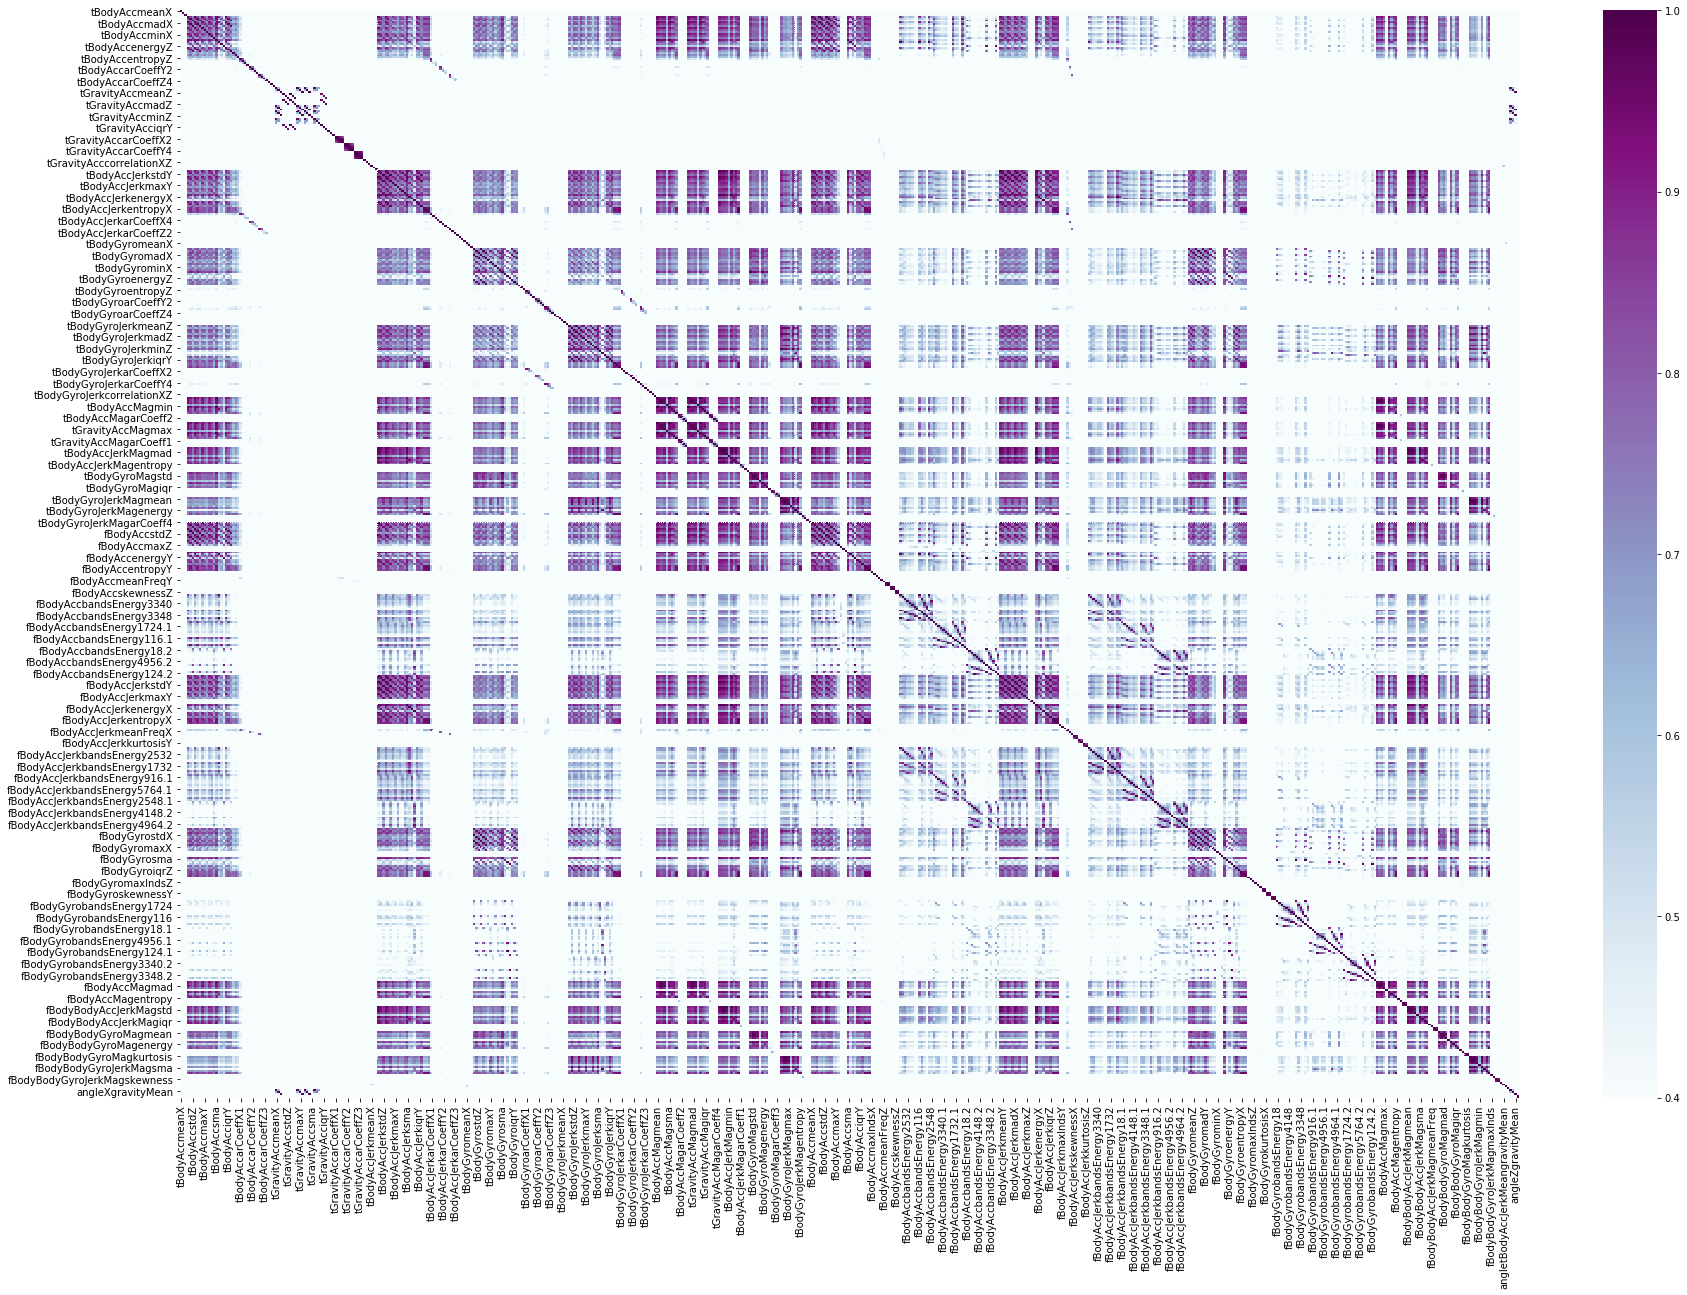

In [35]:
plt.figure(figsize=(30,20))
sns.heatmap(data=(train.corr()*train.corr()),cmap="BuPu",vmin=0.4)
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">As we observe above, our data should contain multiple columns, and they are sensor arrangements. So they are not practicing the best data to visualize.

# Labeling

In [36]:
features_path = "features.txt"

<i><p style="color:black;font-size:15px;">A feature is a restricted property of the object we’re trying to examine. 

In [37]:
features = []
with open(features_path) as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))
print("No. of unique features:{}".format(len(set(features))))

No of Features: 561
No. of unique features:477


In [38]:
# Load library
import collections
# Create dictionary
column_names = collections.defaultdict(str)
# Create keys
for name in train.columns:
    column_names[name]
# Show dictionary
column_names

defaultdict(str,
            {'tBodyAccmeanX': '',
             'tBodyAccmeanY': '',
             'tBodyAccmeanZ': '',
             'tBodyAccstdX': '',
             'tBodyAccstdY': '',
             'tBodyAccstdZ': '',
             'tBodyAccmadX': '',
             'tBodyAccmadY': '',
             'tBodyAccmadZ': '',
             'tBodyAccmaxX': '',
             'tBodyAccmaxY': '',
             'tBodyAccmaxZ': '',
             'tBodyAccminX': '',
             'tBodyAccminY': '',
             'tBodyAccminZ': '',
             'tBodyAccsma': '',
             'tBodyAccenergyX': '',
             'tBodyAccenergyY': '',
             'tBodyAccenergyZ': '',
             'tBodyAcciqrX': '',
             'tBodyAcciqrY': '',
             'tBodyAcciqrZ': '',
             'tBodyAccentropyX': '',
             'tBodyAccentropyY': '',
             'tBodyAccentropyZ': '',
             'tBodyAccarCoeffX1': '',
             'tBodyAccarCoeffX2': '',
             'tBodyAccarCoeffX3': '',
             'tBodyAc

### Check the null values or not

In [39]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


<i><p style="font-size:15px;">As we observed, our train dataset has 7352 instances and 563 attributes.Instantly, let us examine the null values, see if we should have any.

In [40]:
print(train.isnull().sum())
if(any(list(train.isnull().sum())) !=0):
    print("--------------------------")
    print("We have null values")
else:
    print("--------------------------")
    print("We don't have null values")

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleXgravityMean    0
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
Length: 563, dtype: int64
--------------------------
We don't have null values


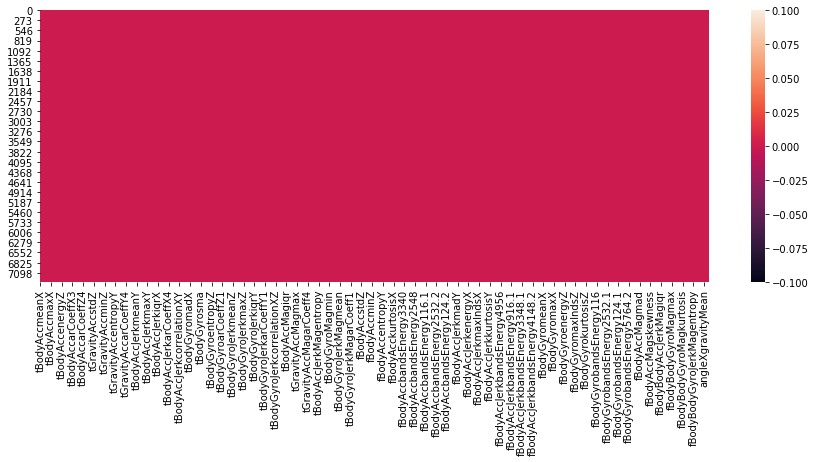

In [41]:
plt.figure(figsize=(15,5)) 
sns.heatmap(train.isnull())

In [42]:
def basic_details(train):
    b = pd.DataFrame()
    b['Missing value'] = train.isnull().sum()
    b['N unique value'] = train.nunique()
    b['dtype'] = train.dtypes
    return b
basic_details(train)

,Missing value,N unique value,dtype
tBodyAccmeanX,0,7347,float64
tBodyAccmeanY,0,7352,float64
tBodyAccmeanZ,0,7349,float64
tBodyAccstdX,0,7349,float64
tBodyAccstdY,0,7351,float64
...,...,...,...
angleXgravityMean,0,7352,float64
angleYgravityMean,0,7352,float64
angleZgravityMean,0,7352,float64
subject,0,21,int64


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We first look at the different activities produced and sensed by the trackers. There are six activities overall. We are so plotting these first.

In [43]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


<i><p style="font-size:15px;">As we observed, our test dataset has 2947 instances and 563 attributes.

In [44]:
def basic_details(test):
    b = pd.DataFrame()
    b['Missing value'] = test.isnull().sum()
    b['N unique value'] = test.nunique()
    b['dtype'] = train.dtypes
    return b
basic_details(test)

,Missing value,N unique value,dtype
tBodyAccmeanX,0,2947,float64
tBodyAccmeanY,0,2947,float64
tBodyAccmeanZ,0,2947,float64
tBodyAccstdX,0,2947,float64
tBodyAccstdY,0,2947,float64
...,...,...,...
angleXgravityMean,0,2947,float64
angleYgravityMean,0,2947,float64
angleZgravityMean,0,2947,float64
subject,0,9,int64


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We first look at the different activities produced and sensed by the trackers. There are six activities overall. We are so plotting these first.

#### Cardinality in categorical variables

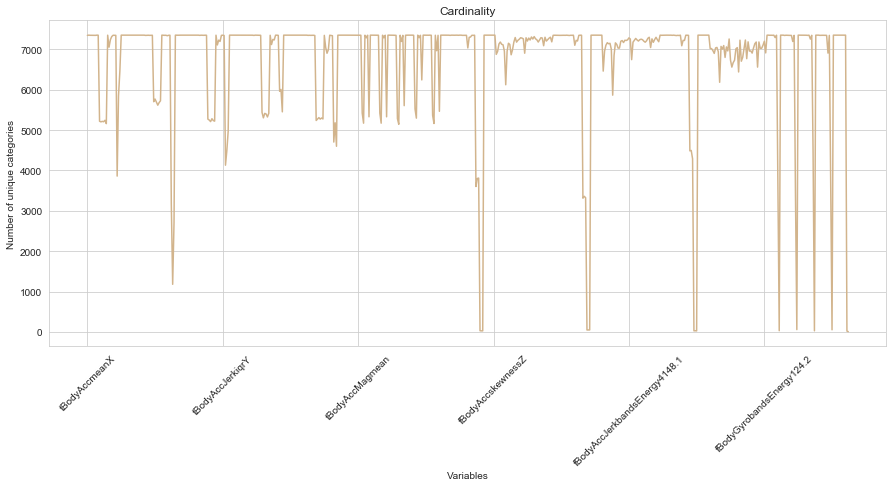

In [45]:
with sns.axes_style('whitegrid'):
    train.nunique().plot.line(figsize=(15,6),color="tan")
    plt.ylabel('Number of unique categories')
    plt.xlabel('Variables')
    plt.title('Cardinality')
    plt.xticks(rotation=45)
    plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">The number of unique categories in a variable is called cardinality.

In [46]:
Acc = 0
Gyro = 0
other = 0

for value in train.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1

<BarContainer object of 3 artists>

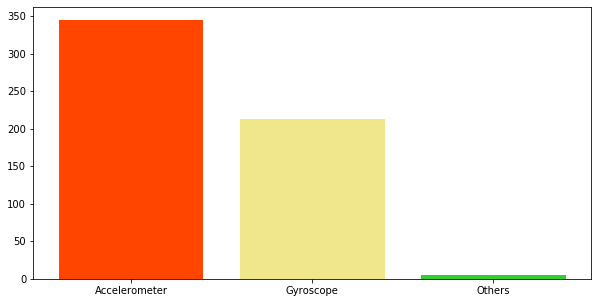

In [47]:
plt.figure(figsize=(10,5))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color = ('orangered', 'khaki', 'limegreen'))

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">Accelerometer aggregates the main features, followed by Gyroscope. Other unusual features are very few.

##  Data Preprocessing

In [48]:
#LABELS
labels = { 'WALKING', 
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING'}

In [49]:
test_model_score = pd.DataFrame(columns = ("Model","Score"))

In [50]:
train_model_score = pd.DataFrame(columns = ("Model","Score"))

<b><p style="font-size:22px;"> Let's the model with our data

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from lightgbm import LGBMClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
import warnings
warnings.filterwarnings("ignore")

In [52]:
#seperating class label from the dataset

Y_train = train.Activity.values
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1)).values

Y_test = test.Activity.values
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1)).values

print("Class labels striped off the dataset")

Class labels striped off the dataset


In [53]:
X_train, X_test,Y_train, Y_test = train_test_split(X_train, Y_train,
                                               test_size = 0.2, 
                                               random_state=42)

In [54]:
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (5881, 561)
Test data size :  (1471, 561)


In [55]:
print('Training model with {} dimensions.'.format(X_train.shape[1]))
print('\nTesting model with {} dimensions.'.format(X_test.shape[1]))

Training model with 561 dimensions.

Testing model with 561 dimensions.


In [56]:
Training_to_original_ratio = round(X_train.shape[0]/(train.shape[0]), 2) * 100

Testing_to_original_ratio = round(X_test.shape[0]/(train.shape[0]), 2) * 100

print ('As shown below {}% of the data is for training and the rest {}% is for testing.'.format(Training_to_original_ratio, 
                                                                                               Testing_to_original_ratio))
list(zip(["Training set", "Testing set"],
   [Training_to_original_ratio, Testing_to_original_ratio]))

As shown below 80.0% of the data is for training and the rest 20.0% is for testing.


[('Training set', 80.0), ('Testing set', 20.0)]

<h3><u> Decision Tree Classifier

<i><p style="color:black;font-size:15px;">Decision tree-based models use training data to derive rules that are used to predict an output. 
<i><p style="color:black;font-size:15px;">Depending on the values from the training data, the model forms a decision tree.

In [57]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0,max_depth=20)
clf_dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [58]:
y_pred = clf_dt.predict(X_test)
x_pred= clf_dt.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [59]:
test_dtc_accuracy = accuracy_score(Y_test, y_pred)
print("Testing Accuracy using Decision Tree Classifier:",test_dtc_accuracy)

Testing Accuracy using Decision Tree Classifier: 0.9211420802175391


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 92% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [60]:
train_dtc_accuracy = accuracy_score(Y_train, x_pred)
print("Testing Accuracy using Decision Tree Classifier:",train_dtc_accuracy)

Testing Accuracy using Decision Tree Classifier: 0.9360652950178541


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 94% while accurately analyzing the predicted output list. 

In [61]:
print('Depth of the Decision Tree :', clf_dt.get_depth())

Depth of the Decision Tree : 8


In [62]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.82      0.88       262
          STANDING       0.85      0.95      0.90       276
           WALKING       0.95      0.92      0.94       247
WALKING_DOWNSTAIRS       0.95      0.89      0.92       206
  WALKING_UPSTAIRS       0.84      0.94      0.89       200

          accuracy                           0.92      1471
         macro avg       0.92      0.92      0.92      1471
      weighted avg       0.93      0.92      0.92      1471



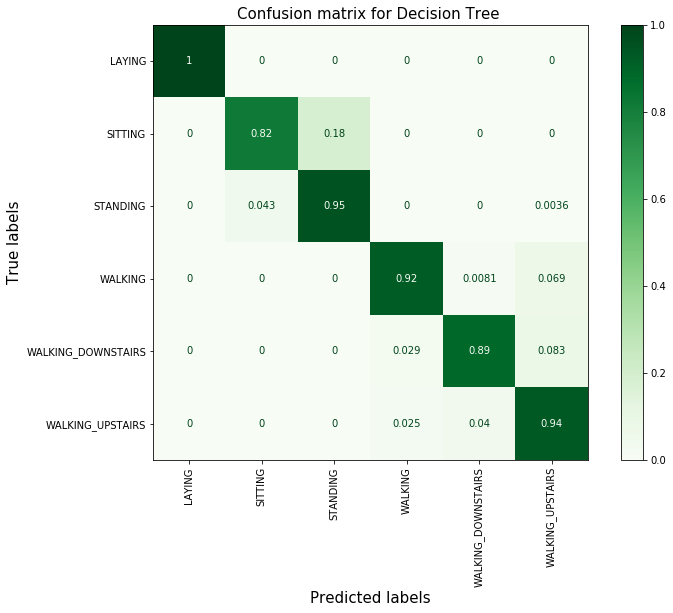

In [63]:
from sklearn.metrics import plot_confusion_matrix
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))
matrix = plot_confusion_matrix(clf_dt, X_test, Y_test,
                                 cmap='Greens',
                                 normalize='true',ax=ax)


plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15} 
plt.title('Confusion matrix for Decision Tree ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show(matrix)

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the Decision tree classifier, well-known exceptions properly include the classification of SITTING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS. Whereas LAYING, WALKING, and STANDING are seemed to fail us sometimes as well. 

In [64]:
train_model_score=train_model_score.append(pd.DataFrame({'Model':["Decision Tree Classifier"],'Score':[train_dtc_accuracy]}))

In [65]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["Decision Tree Classifier"],'Score':[test_dtc_accuracy]}))

In [66]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train[:, :10])
scaler.transform(X_train[:, :10]).mean(axis=0)

array([ 9.73500031e-15, -1.06353740e-15,  4.84925444e-15, -1.73659949e-15,
       -1.60305557e-15, -1.24931711e-15, -8.74321870e-16,  1.13112112e-15,
       -5.28134660e-16, -5.01620321e-16])

In [67]:
X = scaler.fit_transform(X_train)
X.shape

(5881, 561)

In [68]:
my_useless_scaler = preprocessing.StandardScaler(with_mean=False,with_std=False)
transformed_sd = my_useless_scaler.fit_transform(X_train[:, :3]).std(axis=0)
original_sd = X_train[:, :3].std(axis=0)
np.array_equal(transformed_sd, original_sd)

True

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>The possible motivation to properly use this scaling includes robustness to minimal standard deviations of features and preserving zero entries in sparse data.

<h3><u> Logistic Regression

<i><p style='font-size:15px'>In a logistic regression algorithm, instead of predicting the actual continuous value, we expect the probability of an outcome. To achieve data, a logistic function is applied to the outcome of the linear regression. The logistic process is also referred to as a sigmoid function. As a result, it outputs a value between 0 and 1.

In [69]:
parameters = {'C':np.arange(10,61,10),'penalty':['l2','l1']} 

lgr=LogisticRegression(penalty='l2',C=.01)
lgr_clf_rs = RandomizedSearchCV(lgr, param_distributions = parameters, cv = 5, random_state = 42)
lgr_clf_rs.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=0.01, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([10, 20, 30, 40, 50, 60]),
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verb

<i><p style='font-size:15px'>Hyperparameters are essential as they manage the overall behaviour of a machine learning model. The ultimate aim is to find an optimal combination of hyperparameters that decreases a predefined loss function to give more reliable outcomes.
 
<i><p style='font-size:15px'>Grid-search is practiced to obtain the optimal hyperparameters, resulting in the most ‘accurate’ predictions.
    
<i><p style='font-size:15px'>L1 tends to shrink coefficients to zero from a practical standpoint, whereas L2 tends to shrink coefficients evenly. L1 is therefore helpful for feature selection, as we can drop any variables associated with coefficients that go to zero. L2, on the other hand, is valid when you have collinear/codependent features.

In [70]:
y_pred = lgr_clf_rs.predict(X_test)
x_pred = lgr_clf_rs.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [71]:
test_lgr_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using Logisitc Regression:", test_lgr_accuracy)

Testing Accuracy using Logisitc Regression: 0.9782460910944936


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 97.8% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy


In [72]:
# Checking the model's training accuracy
train_lgr_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using Logisitc Regression:", train_lgr_accuracy)

Training Accuracy using Logisitc Regression: 0.9916680836592416


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 99% while accurately analyzing the predicted output list. 

In [73]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.95      0.95       262
          STANDING       0.95      0.95      0.95       276
           WALKING       0.99      1.00      0.99       247
WALKING_DOWNSTAIRS       0.99      1.00      0.99       206
  WALKING_UPSTAIRS       0.99      0.98      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



In [74]:
lgr_clf_rs.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

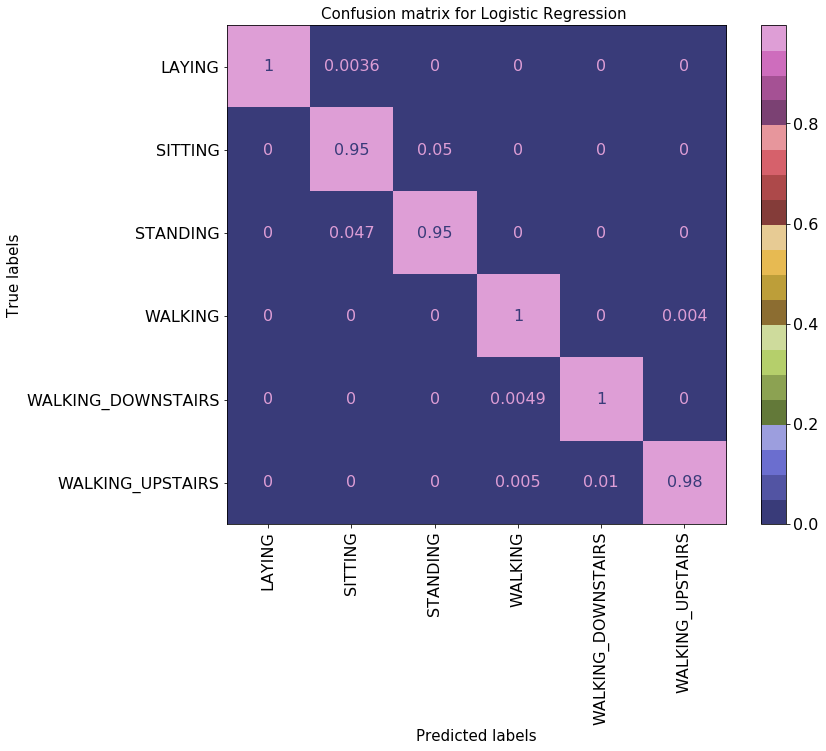

In [75]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))
matrix = plot_confusion_matrix(lgr_clf_rs, X_test, Y_test,
                                 cmap='tab20b',display_labels=None,
                                 normalize='true',ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':'15'} 
plt.title('Confusion matrix for Logistic Regression ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show(matrix)

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the Logistic Regression, well-known exceptions include the classification of SITTING and WALKING_DOWNSTAIRS. Whereas LAYING, WALKING_UPSTAIRS, WALKING, and STANDING seemed to fail us sometimes as well.  

In [76]:
train_model_score=train_model_score.append(pd.DataFrame({'Model':["LogisticRegression"],'Score':[train_lgr_accuracy]}))

In [77]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["LogisticRegression"],'Score':[test_lgr_accuracy]}))

<h3><u> Random Forest Classifier

<i><p style='font-size:15px'>Random Forest Classifier is an ensemble algorithm. In the next one or two posts, we shall explore such algorithms. Ensembled algorithms combine more than one algorithms of the same or different kinds for classifying objects.

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier()
# fit the model with the training data
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
# number of trees used
print('Number of Trees used : ', rfc.n_estimators)

Number of Trees used :  100


In [81]:
y_pred = rfc.predict(X_test)
X_pred = rfc.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [82]:
test_rfc_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using Logisitc Regression:", test_rfc_accuracy)

Testing Accuracy using Logisitc Regression: 0.981645139360979


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 98% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [83]:
# Checking the model's training accuracy
train_rfc_accuracy=accuracy_score(Y_train,x_pred)
print("Testing Accuracy using Logisitc Regression:", train_rfc_accuracy)

Testing Accuracy using Logisitc Regression: 0.9916680836592416


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 99% while accurately analyzing the predicted output list. 

In [84]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.97      0.96      0.96       262
          STANDING       0.96      0.97      0.97       276
           WALKING       0.99      1.00      0.99       247
WALKING_DOWNSTAIRS       1.00      0.98      0.99       206
  WALKING_UPSTAIRS       0.98      0.98      0.98       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



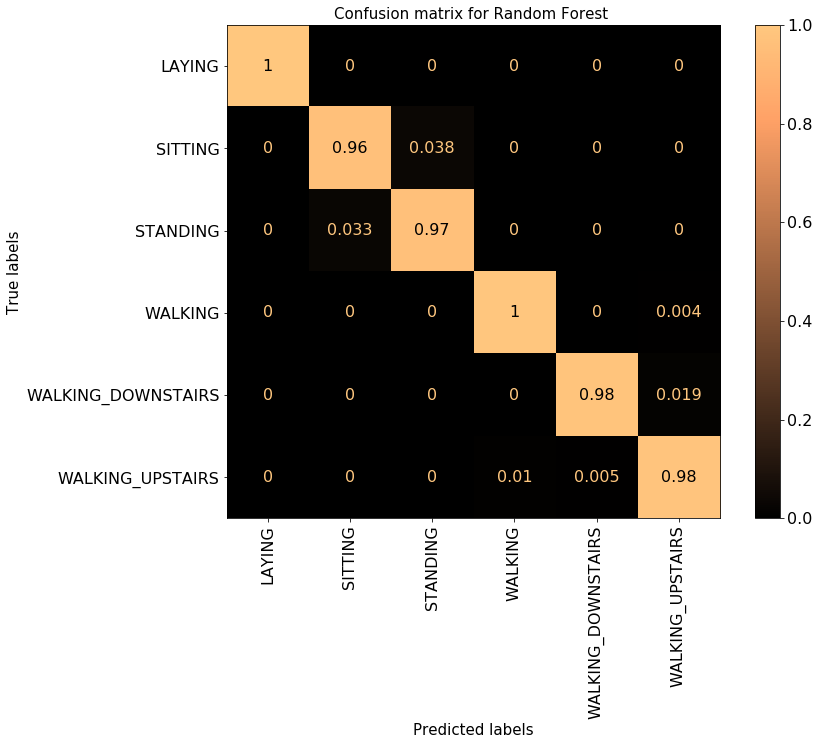

In [85]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))
matrix = plot_confusion_matrix(rfc, X_test, Y_test,
                                 cmap='copper',
                                 normalize='true',ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':'15'} 
plt.title('Confusion matrix for Random Forest ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show(matrix)

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the Random Forest classifier, well-known exceptions include the classification of SITTING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS. Whereas LAYING, WALKING, and STANDING are seemed to fail us sometimes as well. 

In [86]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["Random Forest"],'Score':[train_rfc_accuracy]}))

In [87]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["Random Forest"],'Score':[test_rfc_accuracy]}))

<h3><u> Gradient Boosting Classifier

<i><p style='font-size:15px'>Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models to create a solid predictive model. Decision trees are usually used when doing gradient boosting. 

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gbc = GradientBoostingClassifier(n_estimators=100,max_depth=5)
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
y_pred = gbc.predict(X_test)
x_pred = gbc.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [91]:
test_gbc_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using Gradient Boosting Classifier:", test_gbc_accuracy)

Testing Accuracy using Gradient Boosting Classifier: 0.990482664853841


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 98.8% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [92]:
train_gbc_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using Gradient Boosting Classifier:", train_gbc_accuracy)

Training Accuracy using Gradient Boosting Classifier: 1.0


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 100% while accurately analyzing the predicted output list. 

In [93]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.98      0.97      0.98       262
          STANDING       0.97      0.99      0.98       276
           WALKING       1.00      0.99      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      1.00      1.00       200

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



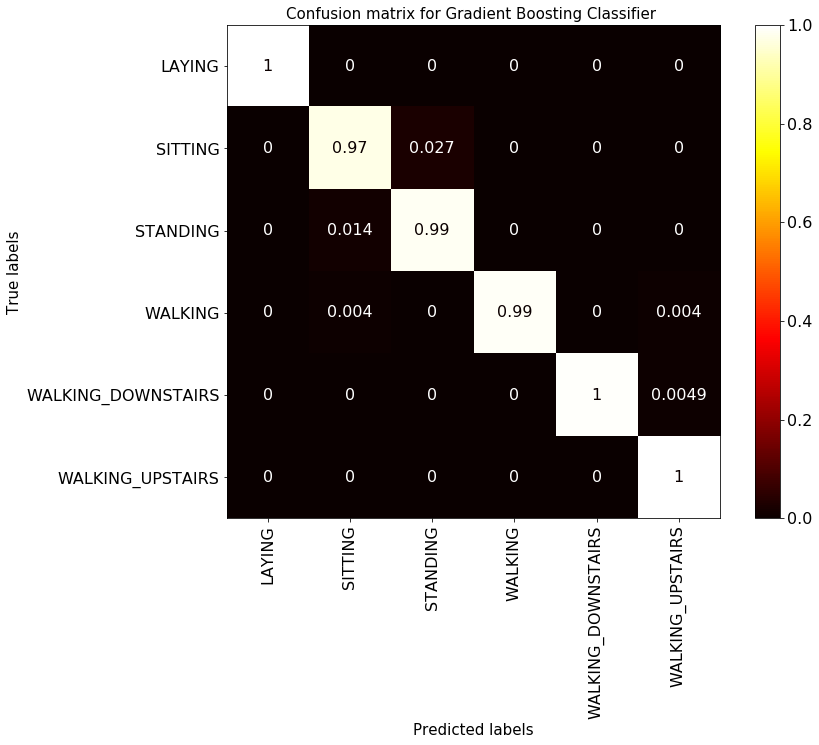

In [94]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))
matrix = plot_confusion_matrix(gbc, X_test, Y_test,
                                 cmap='hot',
                                 normalize='true',ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':'15'} 
plt.title('Confusion matrix for Gradient Boosting Classifier ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show(matrix)

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the Gradient Boosting Classifier, well-known exceptions include the classification of SITTING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, and STANDING. Whereas LAYING and WALKING are seemed to fail us sometimes as well. 

In [95]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':[" Gradient Boosting Classifier"],
                                                     'Score':[train_gbc_accuracy]}))

In [96]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':[" Gradient Boosting Classifier"],
                                                    'Score':[test_gbc_accuracy]}))

<h3><u>  Linear SVC

<i><p style='font-size:15px'> The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification, and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization, which applies 'L1' or 'L2' and loss function. The kernel method can not be changed in linear SVC because it is based on the kernel linear method. 

In [97]:
from sklearn.svm import LinearSVC

In [98]:
parameters = {'C': np.arange(1,12,2)}
lr = LinearSVC(tol = 0.00005)
lr_svm= RandomizedSearchCV(lr, param_distributions = parameters, random_state = 42)
lr_svm.fit(X_train, Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=5e-05,
                                       verbose=0),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([ 1,  3,  5,  7,  9, 11])},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [99]:
y_pred = lr_svm.predict(X_test)
x_pred = lr_svm.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [100]:
test_lrsvm_accuracy = accuracy_score(y_true = Y_test, y_pred = y_pred)
print("Testing Accuracy using Linear SVM:", test_lrsvm_accuracy)

Testing Accuracy using Linear SVM: 0.9850441876274643


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 98.5% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [101]:
# Checking the model's training accuracy
train_lrsvm_accuracy = accuracy_score(Y_train,  x_pred)
print("Training Accuracy using Linear SVM:", train_lrsvm_accuracy)

Training Accuracy using Linear SVM: 0.9959190613841183


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy is at 99.5% while analyzing the predicted output list. 

In [102]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.98      0.96       262
          STANDING       0.98      0.95      0.97       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



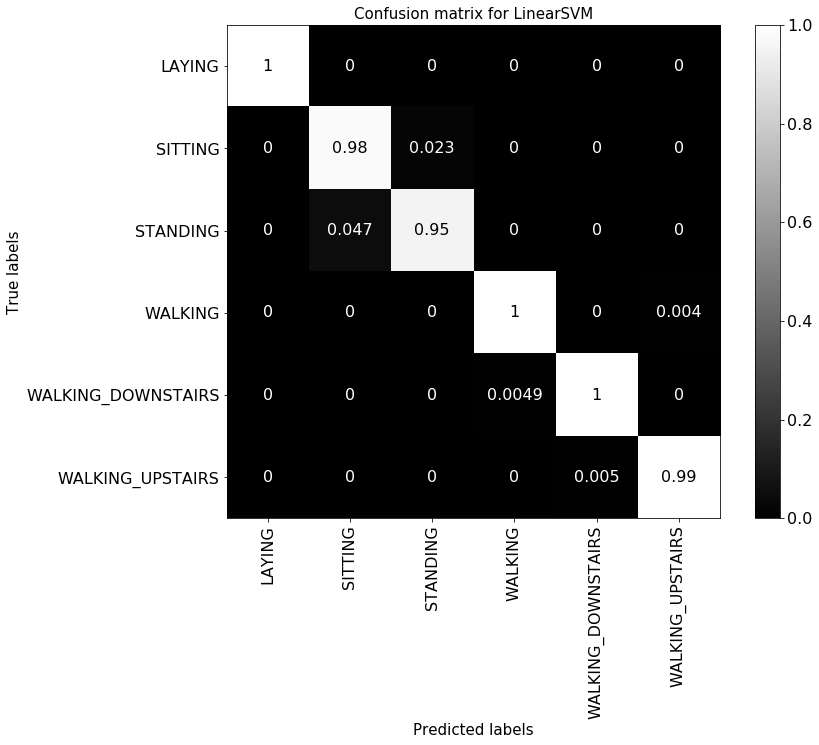

In [103]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))
matrix = plot_confusion_matrix(lr_svm, X_test, Y_test,
                                 cmap='gray',
                                 normalize='true',ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15} 
plt.title('Confusion matrix for LinearSVM',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show(matrix)

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the LinearSVM, well-known exceptions include the classification of SITTING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS. Whereas LAYING, STANDING and WALKING are seemed to fail us sometimes as well. 

In [104]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[train_lrsvm_accuracy]}))

In [105]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[test_lrsvm_accuracy]}))

<u><h3>Linear Discriminant Analysis

<i><p style='font-size:15px'>Linear Discriminant Analysis (LDA) is a dimensionality reduction technique. As the name implies, dimensionality reduction techniques reduce the number of dimensions (i.e., variables) in a dataset while retaining as much information as possible.

In [106]:
# define model
lda= LinearDiscriminantAnalysis()
# fit model
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [107]:
x_pred = lda.predict(X_train)
y_pred = lda.predict(X_test)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [108]:
test_lda_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using Linear Discriminant Analysis:",test_lda_accuracy)

Testing Accuracy using Linear Discriminant Analysis: 0.9775662814411965


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 97.7% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [109]:
# Checking the model's testing accuracy
train_lda_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using Linear Discriminant Analysis:", train_lda_accuracy)

Training Accuracy using Linear Discriminant Analysis: 0.9867369494983846


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 98% while accurately analyzing the predicted output list. 

In [110]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.95      0.95       262
          STANDING       0.96      0.95      0.95       276
           WALKING       1.00      0.99      1.00       247
WALKING_DOWNSTAIRS       1.00      0.99      0.99       206
  WALKING_UPSTAIRS       0.98      1.00      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



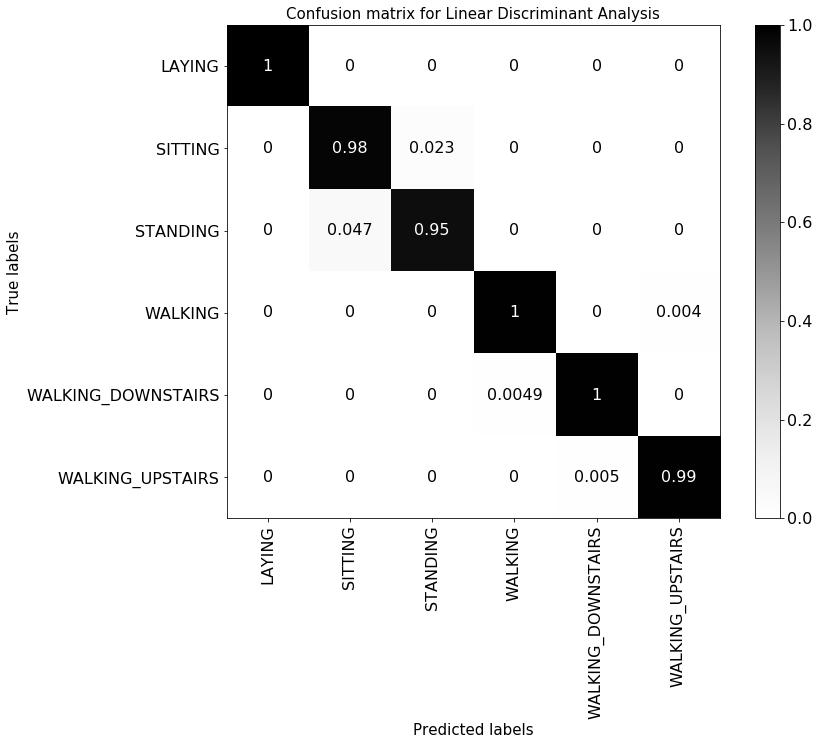

In [111]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))
matrix = plot_confusion_matrix(lr_svm, X_test, Y_test,
                                 cmap='Greys',
                                 normalize='true',ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15}
plt.title('Confusion matrix for Linear Discriminant Analysis',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show(matrix)

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the Linear Discriminant Analysis, well-known exceptions include the classification of SITTING. Whereas LAYING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, and STANDING are seemed to fail us sometimes as well.

In [112]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["Linear Discriminant Analysis"],
                                                           'Score':[train_lda_accuracy]}))

In [113]:
Test_model_score = test_model_score.append(pd.DataFrame({'Model':["Linear Discriminant Analysis"],
                                                    'Score':[test_lda_accuracy]}))

<h3><u>  K-Neighbors Classifier

<i><p style="color:black;font-size:15px;">The general idea behind K-nearest neighbors (KNN) is that data points are estimated to belong to the class with which it participates the most number of common points in terms of its distance. K number of nearest points nearby the data point to be predicted is taken into consideration. These K points at this time already refer to a class. 

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
min_max=MinMaxScaler()

In [115]:
my_odd_scaler = preprocessing.MinMaxScaler(feature_range=(-3.14,3.14))

In [116]:
# Fitting k-NN on our scaled data set
knn1=KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
knn1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [117]:
y_pred = knn1.predict(X_test)
x_pred = knn1.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [118]:
test_knn1_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using K-Nearest Neighbor:", test_knn1_accuracy)

Testing Accuracy using K-Nearest Neighbor: 0.9639700883752549


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 96% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [119]:
# Checking the model's training accuracy
train_knn1_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using K-Nearest Neighbor:", train_knn1_accuracy)

Training Accuracy using K-Nearest Neighbor: 0.980105424247577


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 98% while accurately analyzing the predicted output list. 

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
confusion_matrix(Y_test,y_pred)
pd.crosstab(Y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
Actual,,,,,,,
LAYING,280,0,0,0,0,0,280
SITTING,0,230,32,0,0,0,262
STANDING,0,15,261,0,0,0,276
WALKING,0,0,0,246,0,1,247
WALKING_DOWNSTAIRS,0,0,0,3,202,1,206
WALKING_UPSTAIRS,0,0,0,1,0,199,200
All,280,245,293,250,202,201,1471


<b><p style="font-size:15px;"> Conculsion</b>
<i><p style='font-size:15px'>Most often, our model gets wrong for SITTING and WALKING_DOWNSTAIRS cases. 

<Figure size 432x288 with 0 Axes>

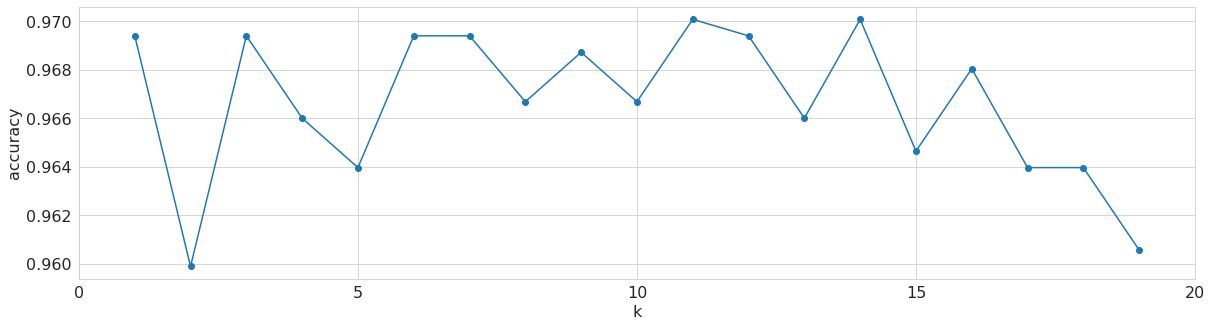

In [122]:
with sns.axes_style('whitegrid'):
    k_range = range(1, 20)
    scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, Y_train)
        scores.append(knn.score(X_test, Y_test))
    plt.figure()
    plt.figure(figsize=(20,5))
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.plot(k_range, scores,'-o')
    plt.xticks([0,5,10,15,20])

<b><p style="font-size:15px;"> Conculsion</b>
<i><p style="color:black;font-size:15px;">For this particular dataset, we obtain the highest accuracy when k=11 and 14.

In [123]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.88      0.91       262
          STANDING       0.89      0.95      0.92       276
           WALKING       0.98      1.00      0.99       247
WALKING_DOWNSTAIRS       1.00      0.98      0.99       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.96      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.96      0.96      0.96      1471



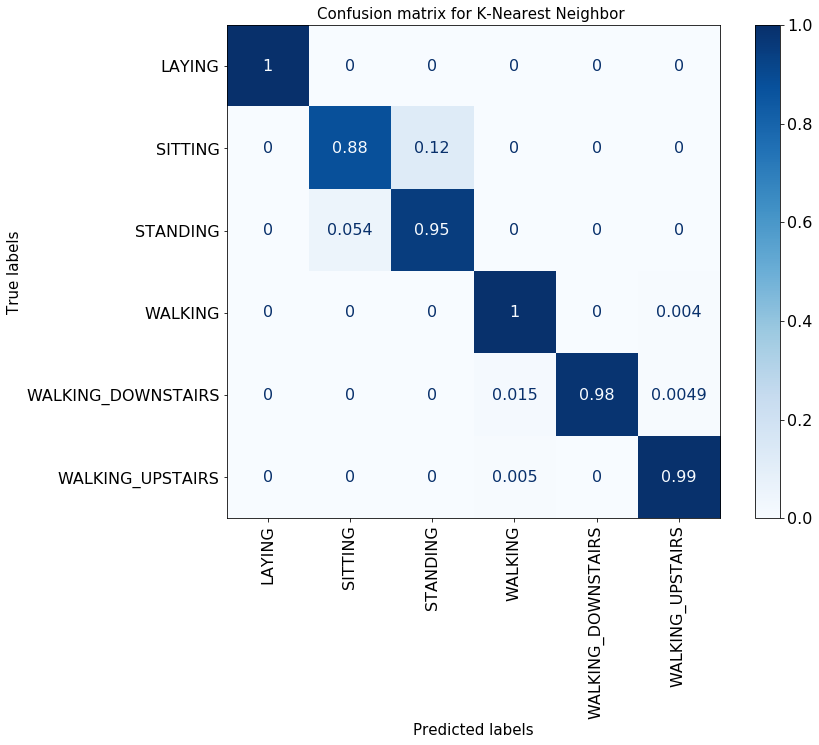

In [124]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))
matrix = plot_confusion_matrix(knn1, X_test, Y_test,
                                 cmap='Blues',
                                normalize='true',ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15}
plt.title('Confusion matrix for K-Nearest Neighbor ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show(matrix)

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the K-Nearest Neighbor, well-known exceptions include the classification of SITTING, WALKING_UPSTAIRS and WALKING_DOWNSTAIRS. Whereas LAYING, WALKING and STANDING are seemed to fail us sometimes as well.

In [125]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["K-Nearest Neighbor"],'Score':[train_knn1_accuracy]}))

In [126]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["K-Nearest Neighbor"],'Score':[test_knn1_accuracy]}))

<h3><u>  Gaussian Naive Bayes

<i><p style="color:black;font-size:15px;">Given the probability of certain related values, the formula to calculate the probability of an event B, given event A to occur is calculated as follows.

P(B|A) = (P(A|B) * P(B) / P(A))

<i><p style="color:black;font-size:15px;">This theory is considered naive, because it assumes that there is no dependency between any of the input features. 

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [129]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Predict the response for train dataset
x_pred = gnb.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [130]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
test_gnb_accuracy=metrics.accuracy_score(Y_test, y_pred)
# Model Accuracy, how often is the classifier correct?
print("Testing Accuracy using Gaussian Naive Bayes :",test_gnb_accuracy)

Testing Accuracy using Gaussian Naive Bayes : 0.7307953772943576


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 73% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy


In [131]:
train_gnb_accuracy=metrics.accuracy_score(Y_train, x_pred)
# Model Accuracy, how often is the classifier correct?
print("Training Accuracy using Gaussian Naive Bayes :",train_gnb_accuracy)

Training Accuracy using Gaussian Naive Bayes : 0.7369494983846284


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 74% while accurately analyzing the predicted output list. 

In [132]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       0.96      0.41      0.58       280
           SITTING       0.51      0.73      0.60       262
          STANDING       0.80      0.89      0.84       276
           WALKING       0.93      0.74      0.82       247
WALKING_DOWNSTAIRS       0.83      0.76      0.79       206
  WALKING_UPSTAIRS       0.65      0.91      0.76       200

          accuracy                           0.73      1471
         macro avg       0.78      0.74      0.73      1471
      weighted avg       0.78      0.73      0.73      1471



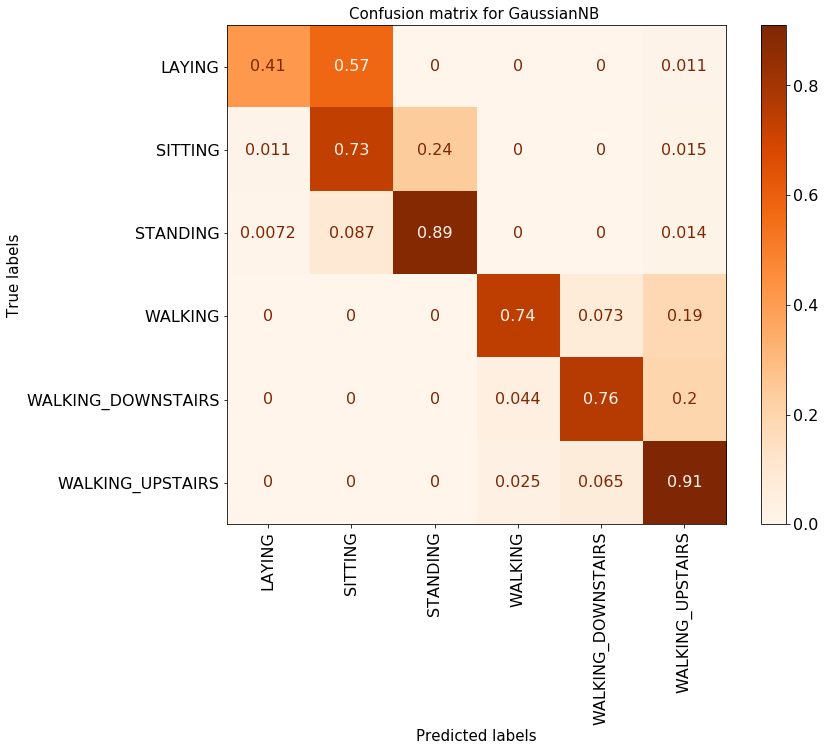

In [133]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))

matrix = plot_confusion_matrix(gnb, X_test, Y_test,
                                 cmap="Oranges",
                                 normalize='true',ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15}
plt.title('Confusion matrix for GaussianNB ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the GaussianNB, well-known exceptions include the classification of SITTING, LAYING and WALKING_DOWNSTAIRS. Whereas WALKING_UPSTAIRS, WALKING and STANDING are seemed to fail us sometimes as well.

In [134]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["GaussianNB"],'Score':[train_gnb_accuracy]}))

In [135]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["GaussianNB"],'Score':[test_gnb_accuracy]}))

<h3><u>  XGBoost

<i><p style='font-size:15px'>XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.), artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree-based algorithms are considered best-in-class right now.

In [136]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [137]:
# fit model no training data
xgbt = XGBClassifier()
xgbt.fit(X_train, Y_train)

[01:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [138]:
# make predictions for test data
y_pred = xgbt.predict(X_test)
# make predictions for train data
x_pred = xgbt.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [139]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
test_xgbt_accuracy=metrics.accuracy_score(Y_test, y_pred)
# Model Accuracy, how often is the classifier correct?
print("Testing Accuracy using XGBoost :",test_xgbt_accuracy)

Testing Accuracy using XGBoost : 0.9938817131203264


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 99.3% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [140]:
train_xgbt_accuracy=metrics.accuracy_score(Y_train, x_pred)
# Model Accuracy, how often is the classifier correct?
print("Training Accuracy using XGBoost :",train_xgbt_accuracy)

Training Accuracy using XGBoost : 1.0


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 100% while accurately analyzing the predicted output list. 

In [141]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.99      0.98      0.99       262
          STANDING       0.99      0.99      0.99       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       1.00      1.00      1.00       200

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



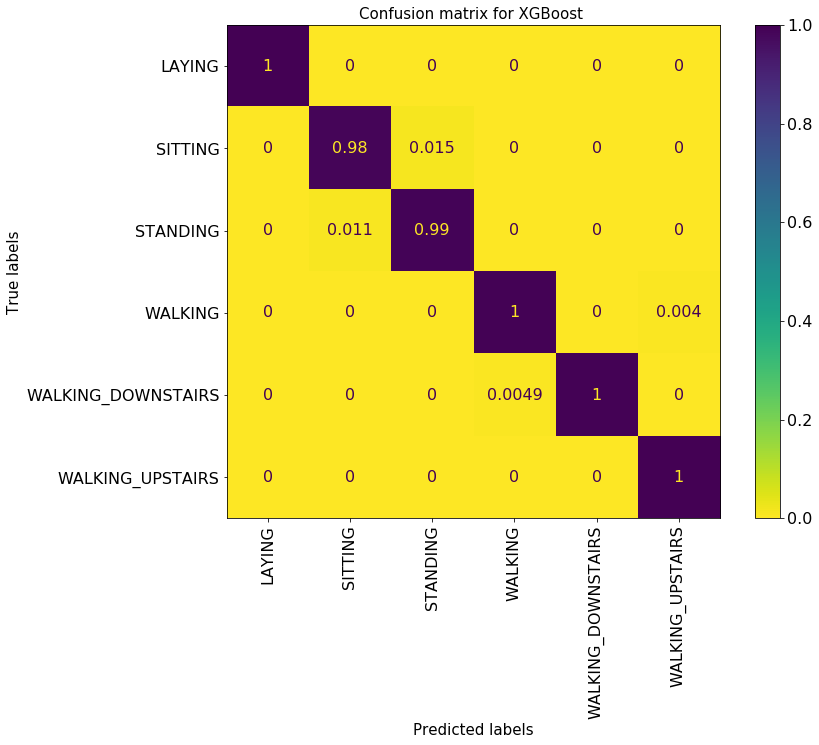

In [142]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))

matrix = plot_confusion_matrix(xgbt, X_test, Y_test,
                                 cmap="viridis_r",
                                 normalize='true',ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15} 
plt.title('Confusion matrix for XGBoost ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the XGBoost, well-known exceptions include the classification of SITTING and WALKING_DOWNSTAIRS. Whereas LAYING, WALKING_UPSTAIRS, WALKING and STANDING are seemed to fail us sometimes as well.

In [143]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["XGBoost"],'Score':[train_xgbt_accuracy]}))

In [144]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["XGBoost"],'Score':[test_xgbt_accuracy]}))

<h3><u>  CatBoost 

<i><p style='font-size:15px'>CatBoost is a high-performance, open-source library for gradient boosting on decision trees. CatBoost is a gradient descent-based algorithm that has an extraordinary feature called self-tuning. It does not require tuning and will train itself to find the best parameters and the best score, for example, the best R-square for regression, the best accuracy for classification. 

In [145]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier(iterations=30) 
catboost.fit(X_train, Y_train)
y_pred = catboost.predict(X_test)
x_pred = catboost.predict(X_train)

Learning rate set to 0.5
0:	learn: 0.6487995	total: 1.07s	remaining: 31s
1:	learn: 0.4756625	total: 1.91s	remaining: 26.7s
2:	learn: 0.3710196	total: 2.71s	remaining: 24.4s
3:	learn: 0.3028222	total: 3.51s	remaining: 22.8s
4:	learn: 0.2707535	total: 4.26s	remaining: 21.3s
5:	learn: 0.2349140	total: 5.05s	remaining: 20.2s
6:	learn: 0.1992463	total: 5.85s	remaining: 19.2s
7:	learn: 0.1847556	total: 6.6s	remaining: 18.1s
8:	learn: 0.1648499	total: 7.37s	remaining: 17.2s
9:	learn: 0.1556797	total: 8.12s	remaining: 16.2s
10:	learn: 0.1454141	total: 9.03s	remaining: 15.6s
11:	learn: 0.1377418	total: 9.84s	remaining: 14.8s
12:	learn: 0.1278217	total: 10.7s	remaining: 13.9s
13:	learn: 0.1195735	total: 11.4s	remaining: 13s
14:	learn: 0.1113089	total: 12.2s	remaining: 12.2s
15:	learn: 0.1004693	total: 13s	remaining: 11.3s
16:	learn: 0.0949937	total: 13.7s	remaining: 10.5s
17:	learn: 0.0927725	total: 14.5s	remaining: 9.67s
18:	learn: 0.0898519	total: 15.2s	remaining: 8.82s
19:	learn: 0.0849009	to

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [146]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
test_cb_accuracy=metrics.accuracy_score(Y_test, y_pred)
# Model Accuracy, how often is the classifier correct?
print("Testing Accuracy using CatBoost :",test_cb_accuracy)

Testing Accuracy using CatBoost : 0.9673691366417403


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 96.7% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [147]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
train_cb_accuracy=metrics.accuracy_score(Y_train, x_pred)
# Model Accuracy, how often is the classifier correct?
print("Training Accuracy using CatBoost :",train_cb_accuracy)

Training Accuracy using CatBoost : 0.9886073796973304


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 98.8% while accurately analyzing the predicted output list. 

In [148]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       280
           SITTING       0.95      0.94      0.94       262
          STANDING       0.95      0.96      0.96       276
           WALKING       0.96      0.97      0.97       247
WALKING_DOWNSTAIRS       0.99      0.97      0.98       206
  WALKING_UPSTAIRS       0.96      0.98      0.97       200

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471



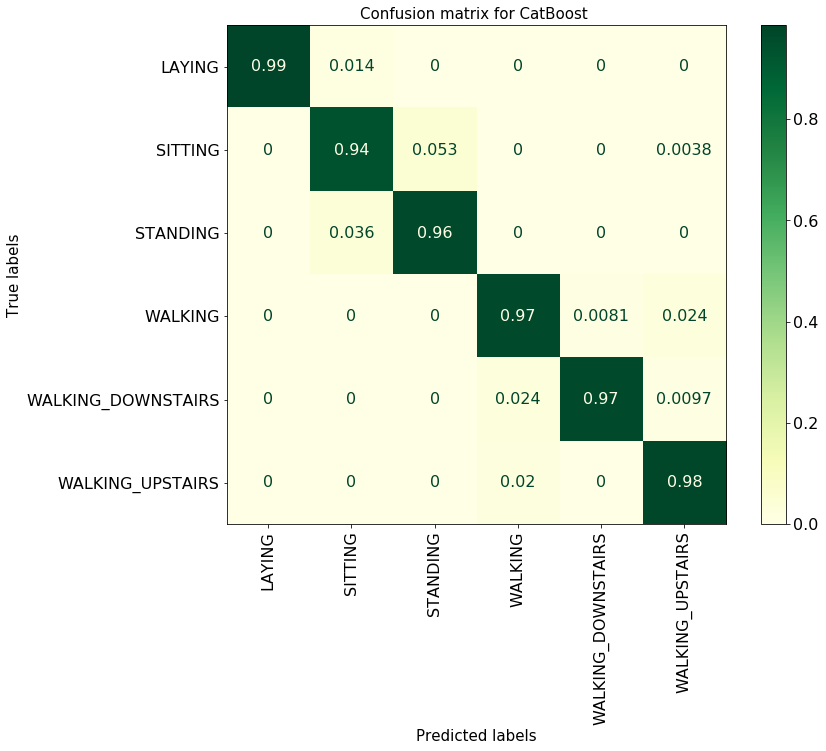

In [149]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8))

matrix = plot_confusion_matrix(catboost, X_test, Y_test,
                                 cmap="YlGn",
                                 normalize='true',ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15}
plt.title('Confusion matrix for CatBoost ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the K-Nearest Neighbor, well-known exceptions include the classification of SITTING, WALKING_UPSTAIRS and WALKING_DOWNSTAIRS. Whereas LAYING, WALKING and STANDING are seemed to fail us sometimes as well.

In [150]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["catboost"],'Score':[train_cb_accuracy]}))

In [151]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["catboost"],'Score':[test_cb_accuracy]}))

<h3><u>AdaBoost Classifier

<i><p style='font-size:15px'>
AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified models.

In [152]:
AB=AdaBoostClassifier()
#Train the model using the training sets
AB.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [153]:
#Predict the response for test dataset
y_pred = AB.predict(X_test)
#Predict the response for train dataset
x_pred = AB.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [154]:
test_AB_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using Ada Boost Classifier():", test_AB_accuracy)

Testing Accuracy using Ada Boost Classifier(): 0.5458871515975526


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 54.6% while accurately analyzing the predicted output list.

<i><p style='font-size:17px'>Checking the model's training accuracy

In [155]:
train_AB_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using Ada Boost Classifier():", train_AB_accuracy)

Training Accuracy using Ada Boost Classifier(): 0.5448053052202007


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 54.5% while accurately analyzing the predicted output list. 

In [156]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.00      0.00      0.00       262
          STANDING       0.51      1.00      0.68       276
           WALKING       0.38      1.00      0.55       247
WALKING_DOWNSTAIRS       0.00      0.00      0.00       206
  WALKING_UPSTAIRS       0.00      0.00      0.00       200

          accuracy                           0.55      1471
         macro avg       0.32      0.50      0.37      1471
      weighted avg       0.35      0.55      0.41      1471



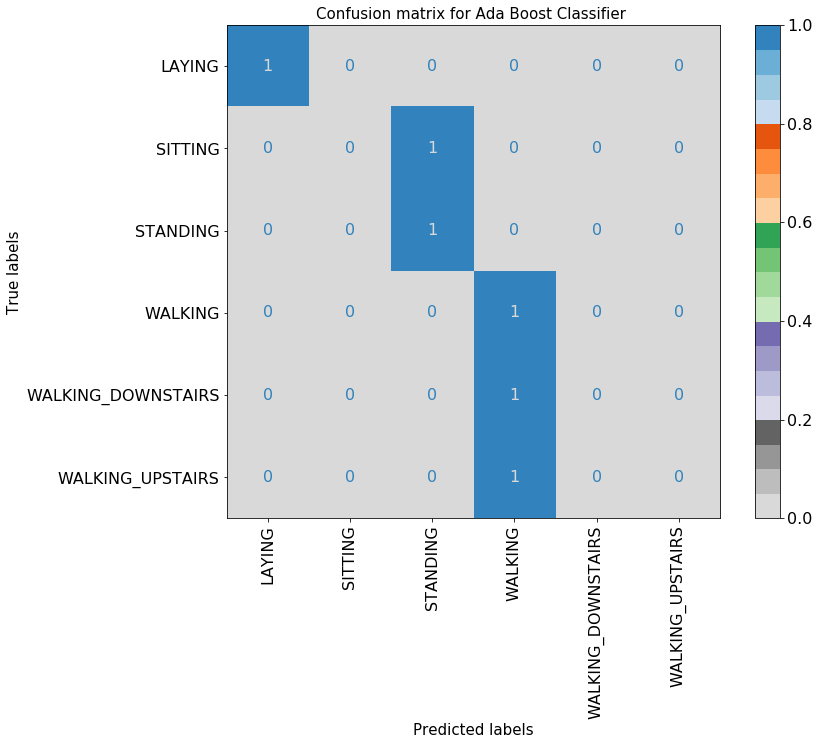

In [157]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8)) 
matrix = plot_confusion_matrix(AB, X_test, Y_test,
                                 cmap='tab20c_r', 
                               normalize='true',
                               ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15}
plt.title('Confusion matrix for Ada Boost Classifier ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the Ada Boost Classifier, most often, our model gets wrong for all Activities cases. 

In [158]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["Ada Boost Classifier"],'Score':[train_AB_accuracy]}))

In [159]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["Ada Boost Classifier"],'Score':[test_AB_accuracy]}))

<u><h3>LightGBM

<i><p style='font-size:15px'>LightGBM is a gradient boosting framework that uses tree-based learning algorithms that are considered robust algorithms when it comes to computation. It is considered to be a fast processing algorithm.
 
<i><p style='font-size:15px'>While other algorithm trees grow horizontally, the LightGBM algorithm produces vertically, meaning it grows leaf-wise, and different algorithms evolve level-wise. LightGBM chooses the leaf with a considerable loss to increase.

In [160]:
#Create the model
lgbm = LGBMClassifier(n_estimators = 500, random_state=3)
lgbm = lgbm.fit(X_train, Y_train)

In [161]:
y_pred = lgbm.predict(X_test)
x_pred = lgbm.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [162]:
test_lgbm_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using LightGBM:", test_lgbm_accuracy)

Testing Accuracy using LightGBM: 0.9938817131203264


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 99% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [163]:
train_lgbm_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using LightGBM:", train_lgbm_accuracy)

Training Accuracy using LightGBM: 1.0


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 100% while accurately analyzing the predicted output list. 

In [164]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.99      0.98      0.98       262
          STANDING       0.98      0.99      0.99       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       1.00      0.99      1.00       200

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



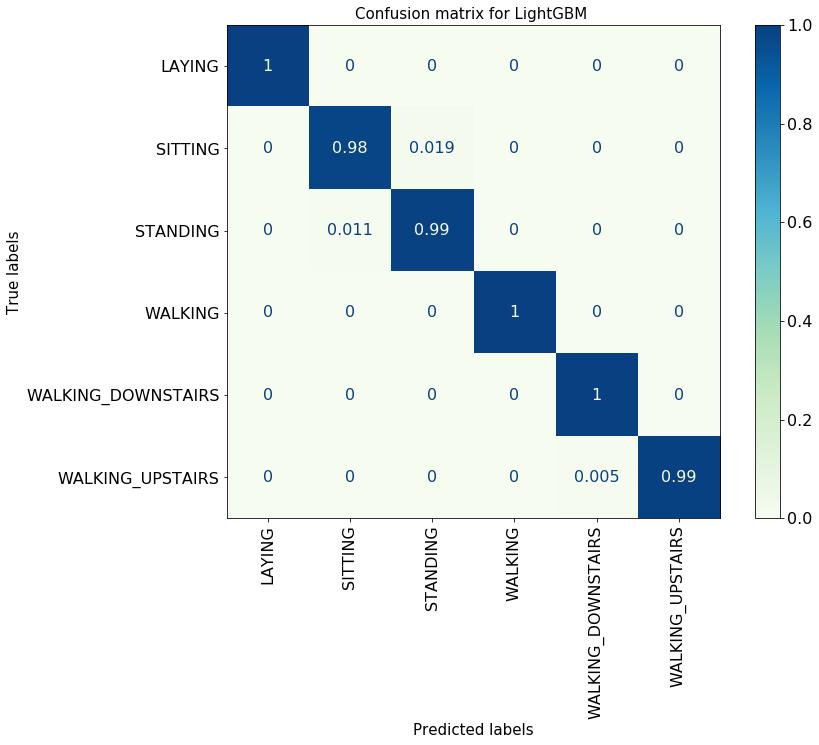

In [165]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8)) 
matrix = plot_confusion_matrix(lgbm, X_test, Y_test,
                                 cmap='GnBu', 
                               normalize='true',
                               ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15}
plt.title('Confusion matrix for LightGBM ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the LightGBM , well-known exceptions include the classification of SITTING, LAYING and WALKING_DOWNSTAIRS. Whereas WALKING_UPSTAIRS, WALKING and STANDING are seemed to fail us sometimes as well.

In [166]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["LightGBM"],
                                                     'Score':[train_lgbm_accuracy]}))

In [167]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["LightGBM"],
                                                    'Score':[test_lgbm_accuracy]}))

<u><h3>OneVsRestClassifier

<i><p style='font-size:15px'>OneVsRestClassifier - when we want to do multiclass or multilabel classification, and its strategy consists of fitting one classifier per class. For each classifier, the class is held against all the other classes 

In [168]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

In [169]:
orc = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
orc.fit(X_train, Y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=True, random_state=0,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [170]:
y_pred = orc.predict(X_test)
x_pred = orc.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [171]:
test_orc_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using OneVsRestClassifier:", test_orc_accuracy)

Testing Accuracy using OneVsRestClassifier: 0.9857239972807614


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 98.6% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [172]:
train_orc_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using OneVsRestClassifier:", train_orc_accuracy)

Training Accuracy using OneVsRestClassifier: 0.9931984356401973


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 99% while accurately analyzing the predicted output list. 

In [173]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.97      0.97      0.97       262
          STANDING       0.97      0.97      0.97       276
           WALKING       1.00      0.99      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



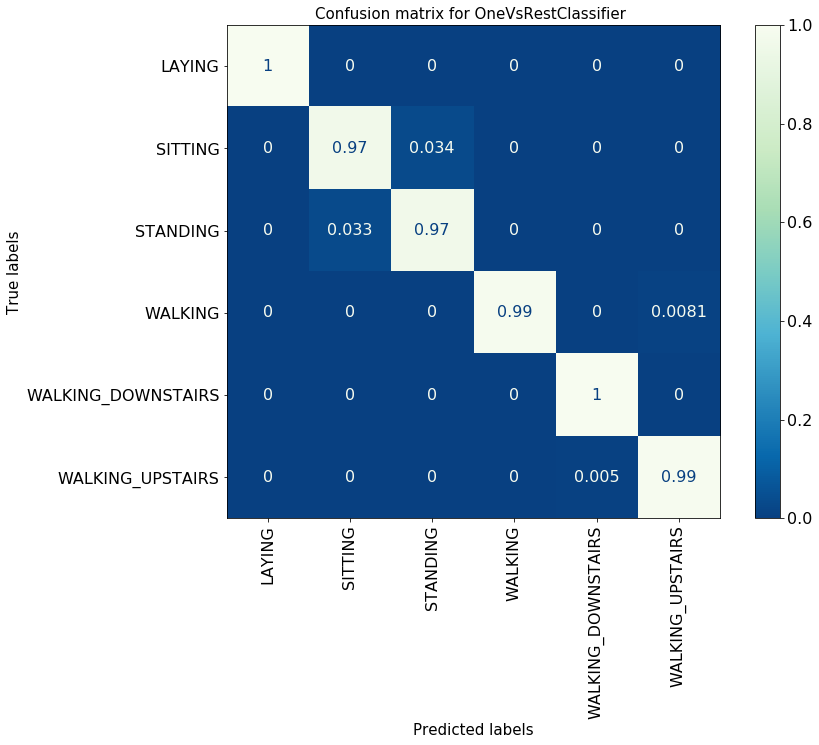

In [174]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8)) 
matrix = plot_confusion_matrix(orc, X_test, Y_test,
                                 cmap='GnBu_r', 
                               normalize='true',
                               ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15} 
plt.title('Confusion matrix for OneVsRestClassifier ',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the GaussianNB, well-known exceptions include the classification of SITTING, LAYING and WALKING_DOWNSTAIRS. Whereas WALKING_UPSTAIRS, WALKING and STANDING are seemed to fail us sometimes as well.

In [175]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["OneVsRestClassifier"],
                                                     'Score':[train_orc_accuracy]}))

In [176]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["OneVsRestClassifier"],
                                                    'Score':[test_orc_accuracy]}))

<h3><u>Variance Threshold

<i><p style='font-size:15px'>VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features with the same value in all samples.

In [177]:
from sklearn.feature_selection import VarianceThreshold
# Create VarianceThreshold object with a variance with a threshold of 0.5
VTH = VarianceThreshold(threshold=.5)

# Conduct variance thresholding
X_high_variance = VTH.fit_transform(X_train)

In [178]:
X_high_variance[0:5]

array([[-0.55511751, -0.81590899, -0.94635692, -1.        , -1.        ],
       [-0.77895525,  0.56749301,  0.31660023,  0.27754216,  0.4866052 ],
       [-0.25617624,  0.74787822,  0.66860558,  0.66259535,  0.40027441],
       [ 0.88272434, -0.61974353, -0.72933706, -0.94369895, -0.93912029],
       [ 0.99381435, -0.83558682, -1.        , -1.        , -1.        ]])

<i><p style='font-size:17px'>View the first five series with unique features with variances above the threshold.

In [179]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.pipeline import make_pipeline

<h3><u>Pipeline

<i><p style='font-size:15px'>Machine learning (ML) pipelines consist of several steps to train a model. Machine learning pipelines are iterative as every effort is repeated to continuously improve the model's accuracy and achieve a successful algorithm. To build better machine learning models and get the most value from them, accessible, scalable, and durable storage solutions are imperative, paving the way for on-premises object storage.

In [180]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [181]:
y_pred = pipe_lr.predict(X_test)
x_pred = pipe_lr.predict(X_train)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [182]:
test_pipe_lr_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using Pipeline:", test_pipe_lr_accuracy)

Testing Accuracy using Pipeline: 0.5465669612508498


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 54.7% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [183]:
train_pipe_lr_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using Pipeline:", train_pipe_lr_accuracy)

Training Accuracy using Pipeline: 0.5424247576942697


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 54.2% while accurately analyzing the predicted output list. 

In [184]:
print(classification_report(Y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       0.39      0.72      0.50       280
           SITTING       0.00      0.00      0.00       262
          STANDING       0.44      0.47      0.46       276
           WALKING       0.77      0.79      0.78       247
WALKING_DOWNSTAIRS       0.68      0.57      0.62       206
  WALKING_UPSTAIRS       0.71      0.80      0.75       200

          accuracy                           0.55      1471
         macro avg       0.50      0.56      0.52      1471
      weighted avg       0.48      0.55      0.50      1471



In [185]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["Pipeline"],
                                                     'Score':[train_pipe_lr_accuracy]}))

In [186]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["Pipeline"],
                                                    'Score':[test_pipe_lr_accuracy]}))

In [187]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                             X=X_train,
                             y=Y_train,
                             cv=10,
                             n_jobs=1)
print('CV accuracy scores:\n %s' % scores)

CV accuracy scores:
 [0.54159593 0.54761905 0.55102041 0.54591837 0.51870748 0.54761905
 0.53571429 0.54931973 0.53571429 0.53911565]


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>By default, the score computed at each CV iteration is the scoring method of the estimator.

<h3><u>Learning curves 

<i><p style='font-size:15px'>A learning curve is a plot of model learning performance over experience or time.
<i><p style='font-size:15px'>Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and a holdout validation dataset after each update during training. We can create plots of the measured performance to show learning curves.

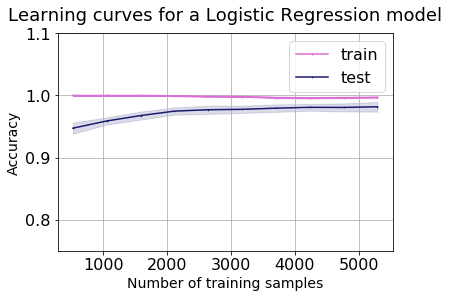

In [188]:
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           random_state=1))

train_sizes, train_scores, test_scores =\
learning_curve(estimator=pipe_lr,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='orchid', 
         marker='o',
        markersize=1, 
         label='train')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std, 
                  color='orchid')

plt.plot(train_sizes, test_mean,
         color='midnightblue', 
         marker='x', markersize=1,
         label='test')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='midnightblue')

plt.grid(True)
plt.xlabel('Number of training samples', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.title('Learning curves for a Logistic Regression model', fontsize = 18, y = 1.03)
plt.legend(loc="best",shadow=False, scatterpoints=1)
plt.ylim([0.75, 1.10])
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>Compared to the theory we covered, our y-axis is 'score,' not 'error,' so the higher the score, the better the model's performance.
   <i><p style='font-size:15px'><li>Training score (pink line) decreases and plateau</li>
        * Indicates underfitting
        * High bias
   <i><p style='font-size:15px'><li>Testing score (blue line) rotting throughout</li>
        * Unable to learn from data


<h3><u> SGDClassifier

<i><p style='font-size:15px'>Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

In [189]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [190]:
y_pred=sgd_clf.predict(X_test)
x_pred=sgd_clf.predict(X_train)

<i><p style='font-size:15px'>The coef_ member to a scipy. sparse matrix, which for L1-regularized models can be much more memory- and storage-efficient than the usual numpy.ndarray representation.

In [191]:
sgd_clf.coef_

array([[-3.56272640e-01, -4.41541499e-03,  2.42518752e-01, ...,
         8.99287906e+00, -2.57860989e+00, -6.34931666e-01],
       [-3.66365021e-01,  2.70904849e-01, -3.98300363e-01, ...,
        -7.53486912e+00, -7.25115804e+00, -1.16007162e+00],
       [ 3.69757840e-01,  1.59959197e-01,  4.51395505e-01, ...,
        -4.27151960e+00,  9.05293793e+00,  9.01464884e-01],
       [-4.89286509e-01, -1.49061077e-02,  1.54231652e-01, ...,
        -1.54834830e+00, -4.80419500e-01,  4.66058804e-01],
       [ 2.27339561e+00,  4.95024078e-01,  7.97824005e-01, ...,
        -2.93530019e+00, -1.24238880e+00, -1.12133033e-01],
       [-1.14825873e+00, -1.10583322e+00, -1.35948394e+00, ...,
         1.33652168e+00,  2.51267134e+00,  1.47429036e+00]])

<i><p style='font-size:17px'>The intercept_ attribute holds the intercept (aka offset or bias)

In [192]:
sgd_clf.intercept_

array([ -9.06622842, -40.09643357, -44.88598755, -35.29951791,
       -12.01449979, -45.57612524])

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>The resulting value you see should be -9.16194034, -39.03137893, -45.36095594, -31.59229152,
        -9.53190555, -51.29282276

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [193]:
test_sgd_clf_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using  SGDClassifier:", test_sgd_clf_accuracy)

Testing Accuracy using  SGDClassifier: 0.9809653297076818


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 98% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'> Checking the model's training accuracy

In [194]:
train_sgd_clf_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using  SGDClassifier:", train_sgd_clf_accuracy)

Training Accuracy using  SGDClassifier: 0.9909879272232613


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 99% while accurately analyzing the predicted output list. 

In [195]:
print(classification_report(Y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.97      0.96       262
          STANDING       0.97      0.95      0.96       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       0.98      1.00      0.99       206
  WALKING_UPSTAIRS       0.99      0.97      0.98       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



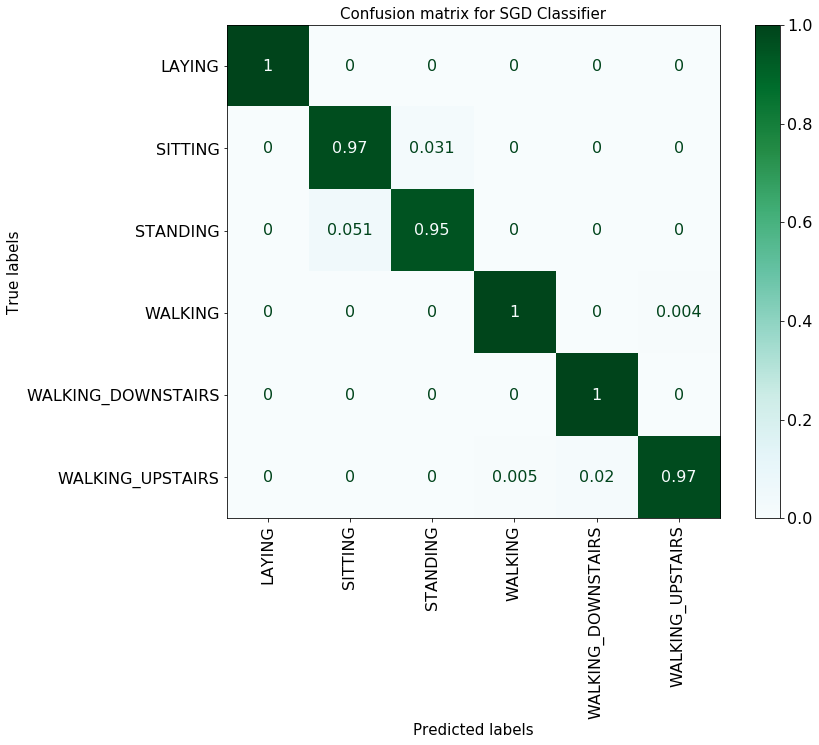

In [196]:
# Generate confusion matrix
fig, ax = plt.subplots(figsize=(12,8)) 
matrix = plot_confusion_matrix(sgd_clf, X_test, Y_test,
                                 cmap='BuGn', 
                               normalize='true',
                               ax=ax)

fig.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.xlim(-0.5, len(np.unique(Y_train))-0.5)
plt.ylim(len(np.unique(Y_train))-0.5, -0.5)
label_font = {'size':15}
plt.title('Confusion matrix for SGD Classifier',fontdict=label_font)
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);
plt.xticks(rotation = 90)
plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>As a result, in the confusion matrix of the SGD Classifier, well-known exceptions include the classification of SITTING and STANDING. Whereas WALKING_UPSTAIRS,LAYING, WALKING_DOWNSTAIRS, WALKING are seemed to fail us sometimes as well.

In [197]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["SGD Classifier"],
                                                     'Score':[train_pipe_lr_accuracy]}))

In [198]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["SGD Classifier"],
                                                    'Score':[test_pipe_lr_accuracy]}))

In [199]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

le = LabelEncoder()
Y_test = le.fit_transform(Y_test)

In [200]:
le_name = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


<h2><u>Applying PCA

In [201]:
pca = PCA(50)

pca.fit(X_train)
pca.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [202]:
train_x_pca = pca.transform(X_train)
test_x_pca = pca.transform(X_test)

<i><p style="color:black;font-size:17px;">The fit learns some quantities from the data, most importantly the "components" and "explained variance"

In [203]:
print(pca.n_components_)
print(pca.explained_variance_)

50
[35.22112343  2.84486052  2.20852607  1.05577942  0.93216131  0.71717364
  0.68519854  0.59056802  0.53673124  0.48100038  0.4213355   0.40437497
  0.34420838  0.30277069  0.29052987  0.27778287  0.25751593  0.24340005
  0.23269124  0.23112339  0.21729537  0.20754203  0.19929849  0.19181623
  0.18441431  0.18174996  0.17644043  0.16779752  0.16548495  0.1605589
  0.1574444   0.15064409  0.14224201  0.13807775  0.13239725  0.1281787
  0.12599478  0.12111524  0.11178614  0.10768942  0.10755583  0.1049465
  0.10091166  0.09692302  0.09350382  0.09305324  0.09196127  0.08849512
  0.08601476  0.08139926]


In [204]:
lgr_pca = LogisticRegression(penalty='l2',solver='lbfgs',class_weight='balanced', max_iter=10000,random_state = 0) 
lgr_pca.fit(train_x_pca, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [205]:
y_pred = lgr_pca.predict(test_x_pca)
x_pred = lgr_pca.predict(train_x_pca)

<i><p style='font-size:17px'>Checking the model's testing accuracy

In [206]:
test_lgrpca_accuracy=accuracy_score(Y_test,y_pred)
print("Testing Accuracy using Logistic Regression with PCA:", test_lgrpca_accuracy)

Testing Accuracy using Logistic Regression with PCA: 0.9571719918422842


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's testing accuracy efficiently is at 95.7% while accurately analyzing the predicted output list. 

<i><p style='font-size:17px'>Checking the model's training accuracy

In [207]:
train_lgrpca_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using Logistic Regression with PCA:", train_lgrpca_accuracy)

Training Accuracy using Logistic Regression with PCA: 0.9665022955279714


<b><p style="font-size:15px;"> Conclusion</b>
<i><p style="color:black;font-size:15px;">We recognize that the model's training accuracy efficiently is at 96.7% while accurately analyzing the predicted output list. 

In [208]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.92      0.89      0.90       262
           2       0.90      0.93      0.91       276
           3       0.98      0.98      0.98       247
           4       0.99      0.99      0.99       206
           5       0.97      0.97      0.97       200

    accuracy                           0.96      1471
   macro avg       0.96      0.96      0.96      1471
weighted avg       0.96      0.96      0.96      1471



In [209]:
train_model_score = train_model_score.append(pd.DataFrame({'Model':["Logistic Regression using PCA"],
                                                    'Score':[train_lgrpca_accuracy]}))

In [210]:
test_model_score = test_model_score.append(pd.DataFrame({'Model':["Logistic Regression using PCA"],
                                                    'Score':[test_lgrpca_accuracy]}))

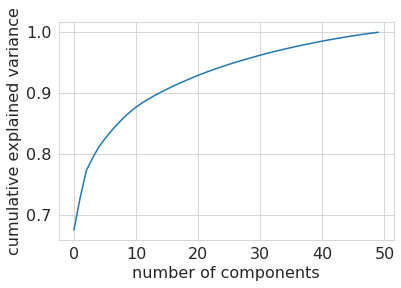

In [211]:
pca = PCA().fit(train_x_pca)
with sns.axes_style('whitegrid'):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

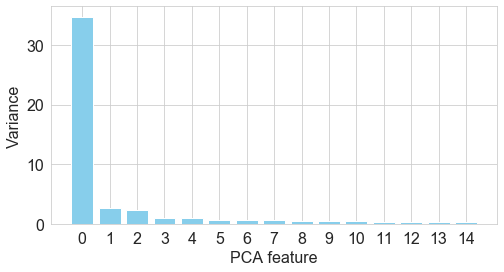

In [212]:
pca = PCA(random_state=123)
pca.fit(X_train)
features = range(pca.n_components_)
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8,4))
    plt.bar(features[:15], pca.explained_variance_[:15], color='skyblue')
    plt.xlabel('PCA feature')
    plt.ylabel('Variance')
    plt.xticks(features[:15])
    plt.show()


<h3><u>Incremental principal component analysis (IPCA)

<i><p style='font-size:15px'>Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed too large to fit in memory. IPCA builds a low-rank approximation for the input data using an amount of memory independent of the number of input data samples. It is still dependent on the input data features, but changing the batch size allows for control of memory usage.

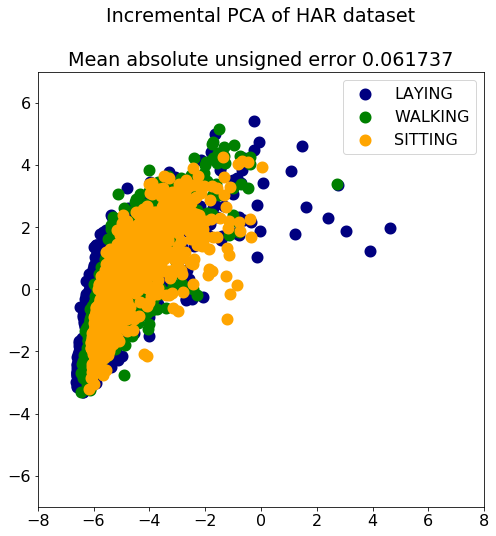

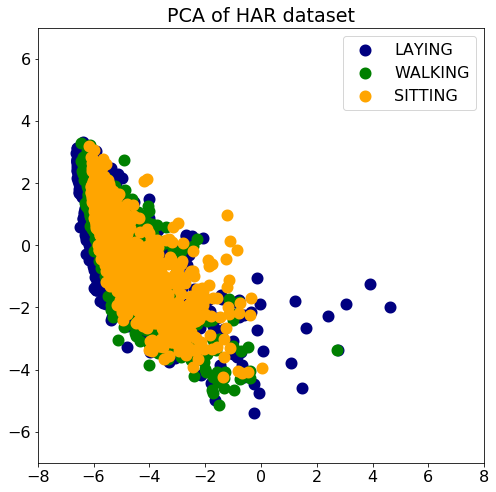

In [213]:
n_components = 10
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X_train)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)

colors = ['navy', 'green', 'orange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0,1,2],labels):
        plt.scatter(X_transformed[Y_train == i, 0], X_transformed[Y_train == i, 1],
                    color=color, lw=6, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of HAR dataset\n\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of HAR dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-8, 8, -7, 7])

plt.show()

<b><p style="font-size:15px;"> Conclusion</b>
<i><p style='font-size:15px'>PCA works best on data set having three or higher dimensions. With higher dimensions, it becomes increasingly challenging to make interpretations from the resultant cloud of data.
<i><p style='font-size:15px'>Mean absolute unsigned error 0.061737
    

<b><p style='font-size:17px'>Training Accuracy Score To Evaluate Machine Learning Algorithms

In [214]:
train_model_score

,Model,Score
0,Decision Tree Classifier,0.936065
0,LogisticRegression,0.991668
0,Random Forest,0.991668
0,Gradient Boosting Classifier,1.000000
0,LinearSVM,0.995919
0,Linear Discriminant Analysis,0.986737
0,K-Nearest Neighbor,0.980105
0,GaussianNB,0.736949
0,XGBoost,1.000000
0,catboost,0.988607


<b><p style='font-size:17px'>Testing Accuracy Score To Evaluate Machine Learning Algorithms

In [215]:
test_model_score

,Model,Score
0,Decision Tree Classifier,0.921142
0,LogisticRegression,0.978246
0,Random Forest,0.981645
0,Gradient Boosting Classifier,0.990483
0,LinearSVM,0.985044
0,K-Nearest Neighbor,0.963970
0,GaussianNB,0.730795
0,XGBoost,0.993882
0,catboost,0.967369
0,Ada Boost Classifier,0.545887
